In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [2]:
#Reading csv 
df=pd.read_csv('covidcases_time.csv')
df.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,01/22/2020,CO,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
1,01/23/2020,CO,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
2,01/24/2020,CO,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
3,01/25/2020,CO,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
4,01/26/2020,CO,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,03/26/2020 04:22:39 PM,Agree,Agree


In [3]:
df.tail()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
15957,10-11-2020,PW,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.0,0.0,10-12-2020 14:07,NaN,NaN
15958,10-12-2020,PW,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.0,0.0,10/13/2020 01:29:38 PM,NaN,NaN
15959,10/13/2020,PW,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.0,0.0,10/14/2020 01:28:39 PM,NaN,NaN
15960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.describe()

,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death
count,15960.000000,5535.000000,5535.000000,15960.000000,10696.000000,15960.000000,5890.000000,5890.000000,15960.000000,10694.000000
mean,44061.458647,52523.613189,2242.421680,490.915226,22.156788,1585.321429,2518.080985,271.346859,13.483333,1.125771
std,95157.360992,62373.778730,3582.795817,1134.785316,217.324853,3510.641207,3875.458215,848.337441,60.875628,90.238764
min,0.000000,0.000000,0.000000,-10427.000000,-4832.000000,0.000000,0.000000,0.000000,-1824.000000,-5482.000000
25%,12.000000,4937.000000,0.000000,0.000000,0.000000,0.000000,193.000000,0.000000,0.000000,0.000000
50%,6138.000000,26431.000000,538.000000,100.000000,0.000000,144.000000,984.000000,21.000000,1.000000,0.000000
75%,47708.500000,80719.000000,3157.000000,530.000000,5.000000,1323.000000,3080.750000,171.000000,10.000000,0.000000
max,852406.000000,324743.000000,27887.000000,17844.000000,5014.000000,23905.000000,19258.000000,5482.000000,4585.000000,5482.000000


In [5]:
df.isnull().sum()

submission_date        2
state                  2
tot_cases              2
conf_cases         10427
prob_cases         10427
new_case               2
pnew_case           5266
tot_death              2
conf_death         10072
prob_death         10072
new_death              2
pnew_death          5268
created_at             2
consent_cases       2928
consent_deaths      2662
dtype: int64

In [6]:
df['submission_date']=pd.to_datetime(df['submission_date'], errors='coerce')
df=df.dropna(subset=['submission_date'])
df.set_index('submission_date', inplace=True)

In [7]:
df.head()

,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
submission_date,,,,,,,,,,,,,,
2020-01-22,CO,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
2020-01-23,CO,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
2020-01-24,CO,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
2020-01-25,CO,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
2020-01-26,CO,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,03/26/2020 04:22:39 PM,Agree,Agree


In [8]:
numerical_cols = ['tot_cases', 'conf_cases', 'prob_cases', 'new_case', 'pnew_case', 
                  'tot_death', 'conf_death', 'prob_death', 'new_death', 'pnew_death']
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

In [9]:
categorical_cols = ['state', 'created_at', 'consent_cases', 'consent_deaths']
df[categorical_cols] = df[categorical_cols].fillna('Unknown')

In [10]:
#Outliers removing rows where cases or deaths are negative
df = df[(df['tot_cases'] >= 0) & (df['tot_death'] >= 0)]

In [11]:
df['state'].unique()

array(['CO', 'FL', 'AZ', 'SC', 'CT', 'NE', 'KY', 'WY', 'IA', 'NM', 'ND',
       'WA', 'RMI', 'TN', 'AS', 'MA', 'PA', 'NYC', 'OH', 'AL', 'VA', 'MI',
       'MS', 'CA', 'IL', 'TX', 'WI', 'NV', 'NJ', 'LA', 'PR', 'OK', 'IN',
       'NC', 'GA', 'OR', 'MD', 'NY', 'ID', 'AR', 'UT', 'MO', 'DE', 'MN',
       'WV', 'RI', 'SD', 'DC', 'ME', 'NH', 'KS', 'MT', 'HI', 'AK', 'VT',
       'GU', 'VI', 'MP', 'FSM', 'PW'], dtype=object)

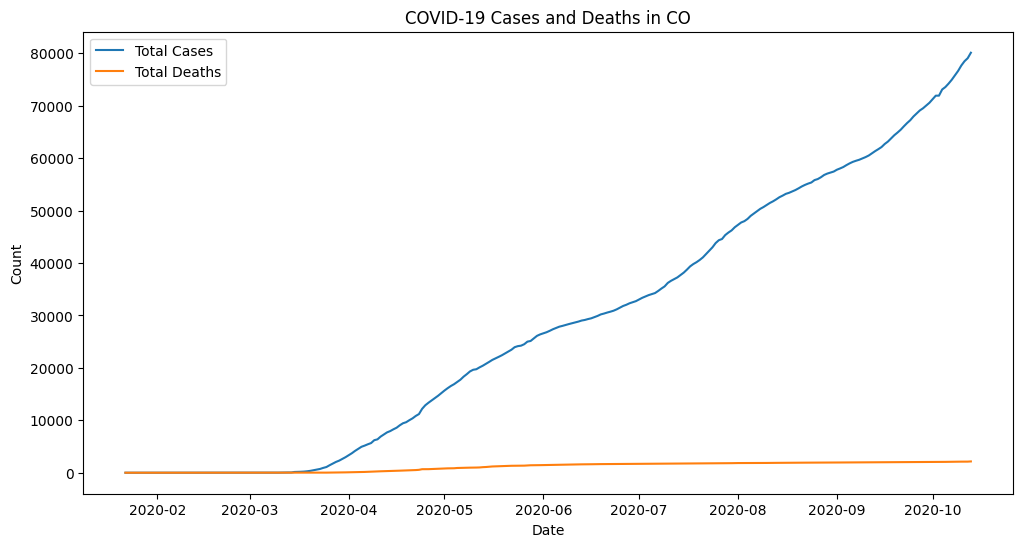

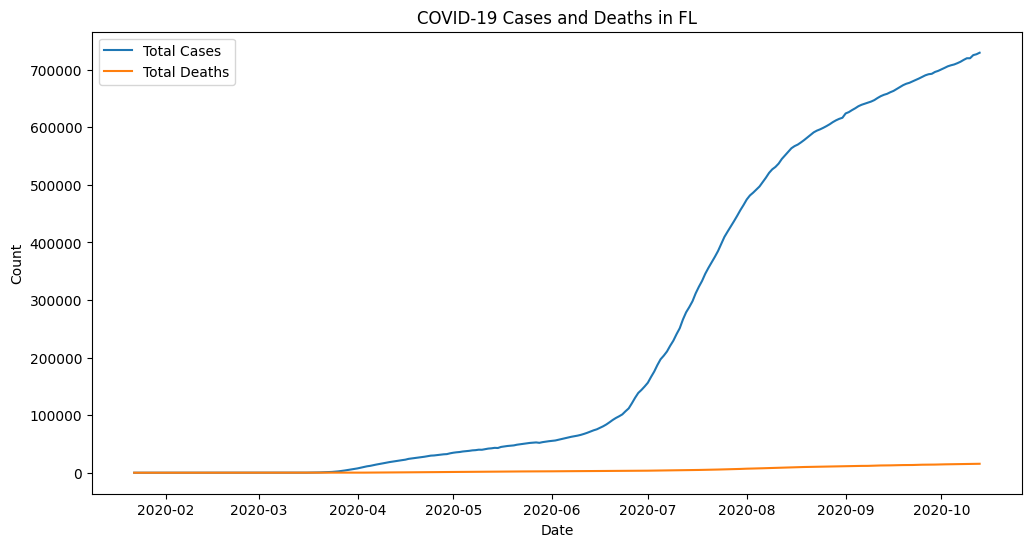

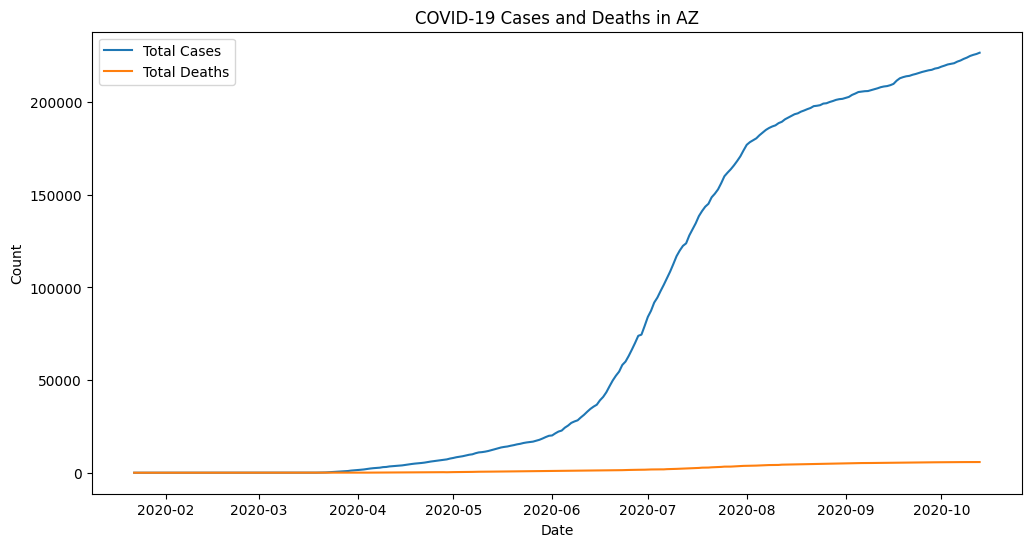

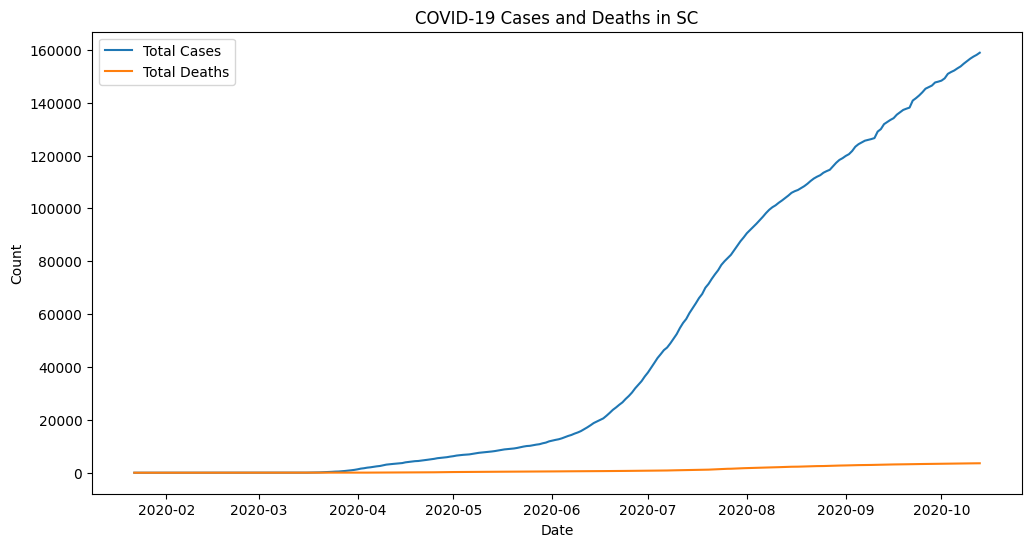

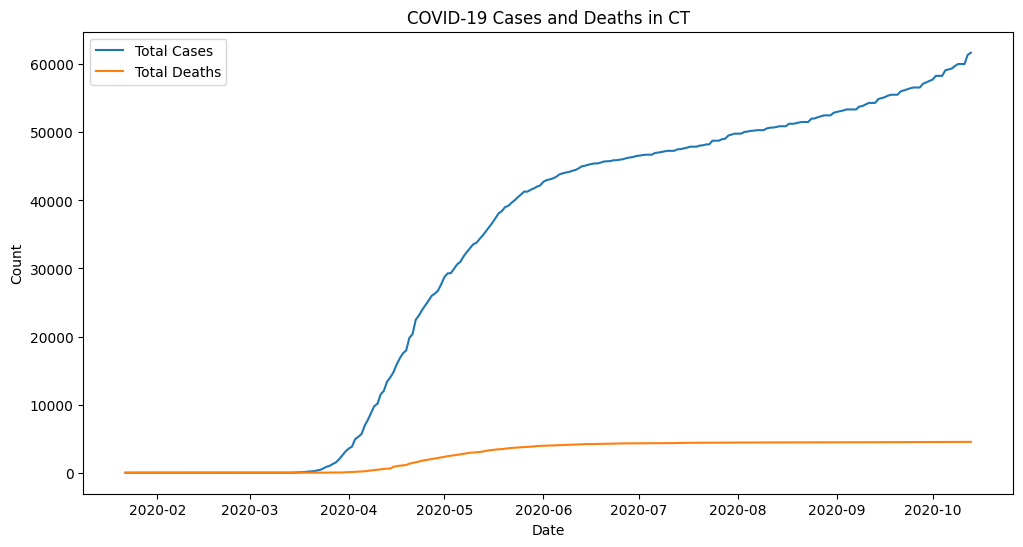

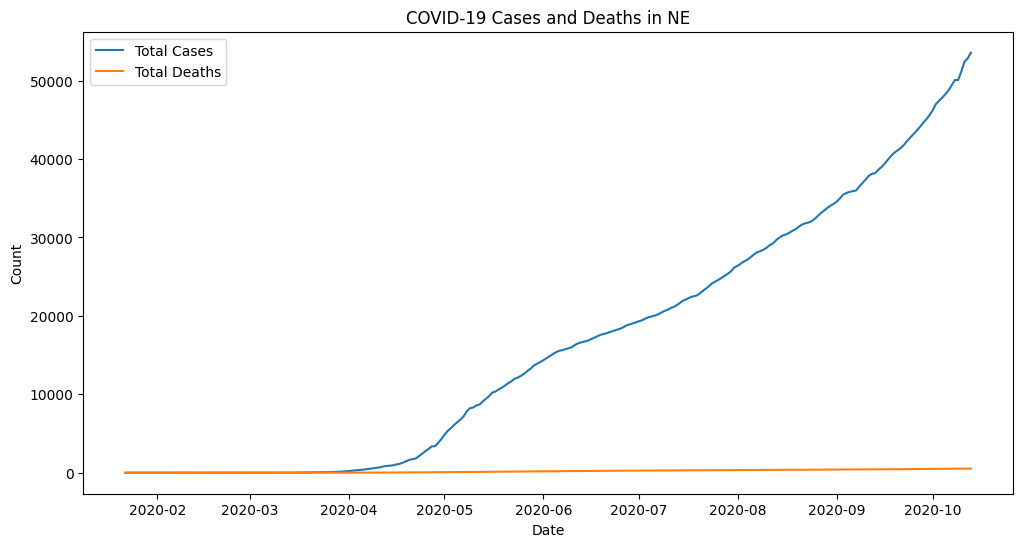

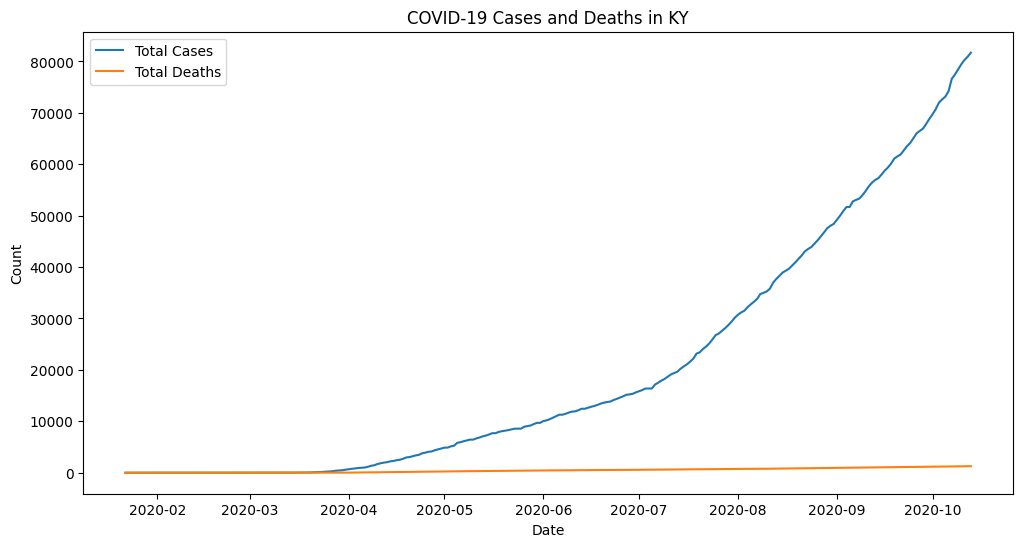

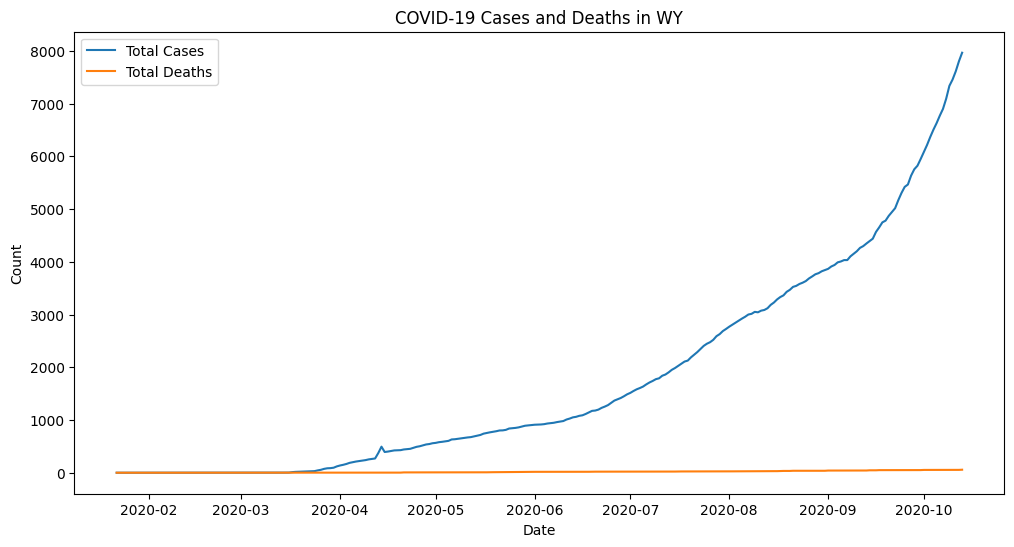

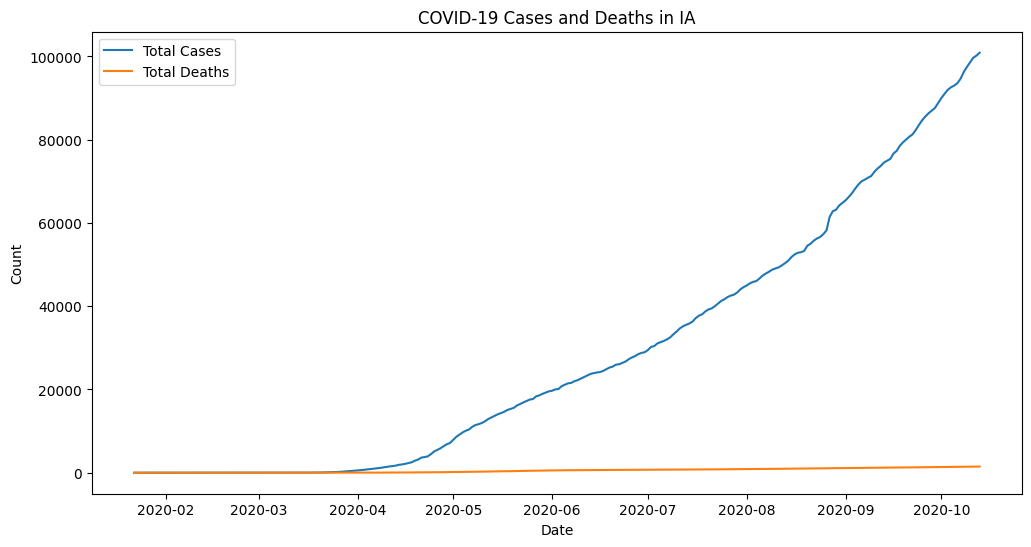

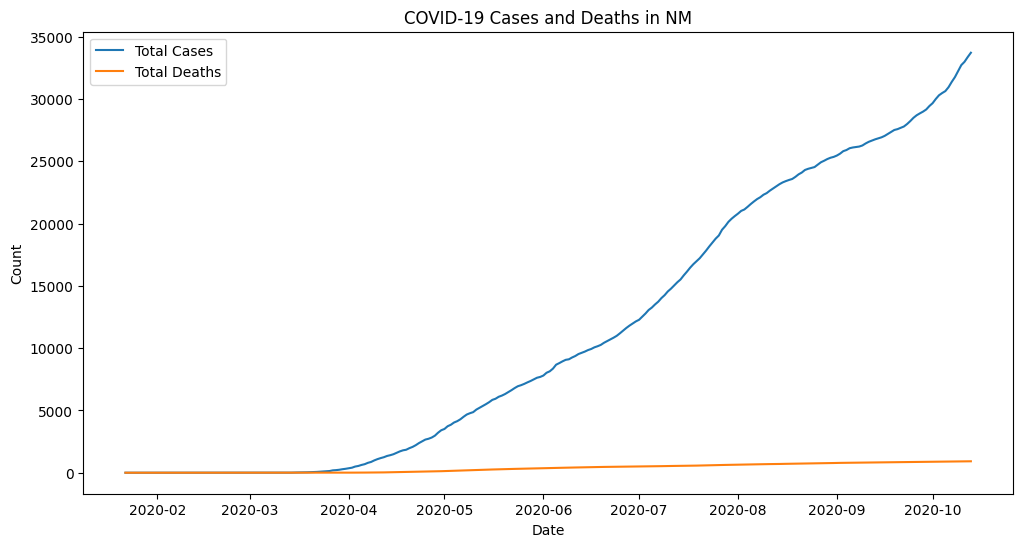

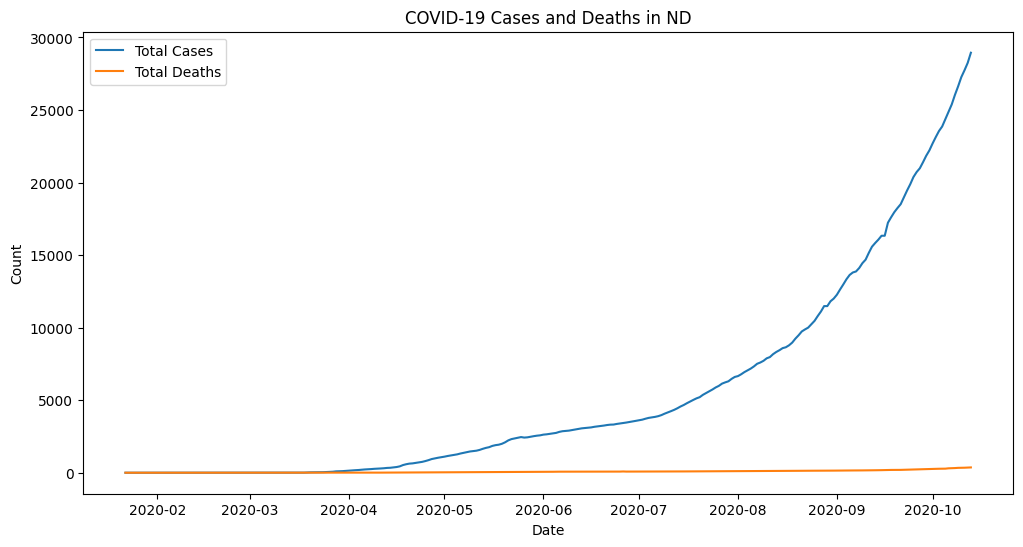

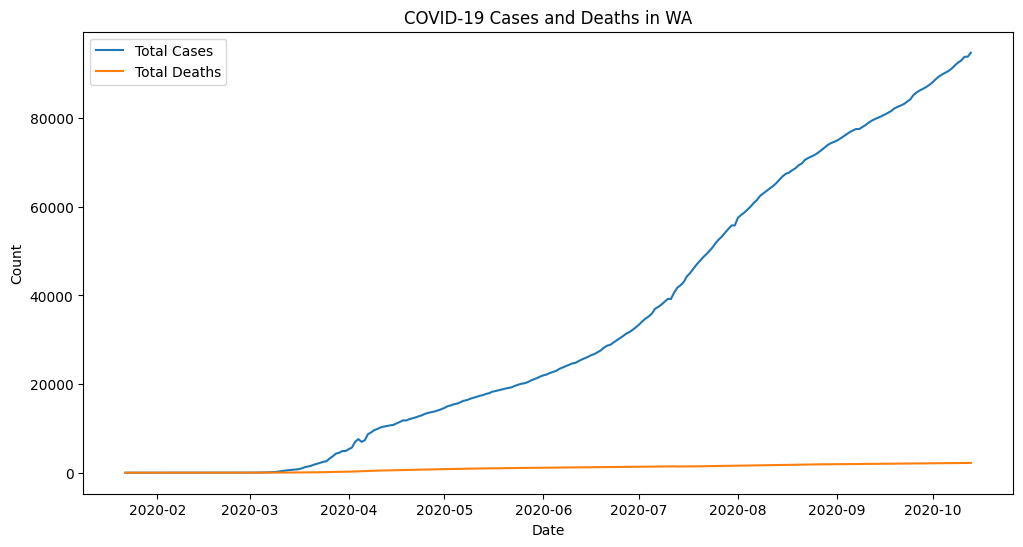

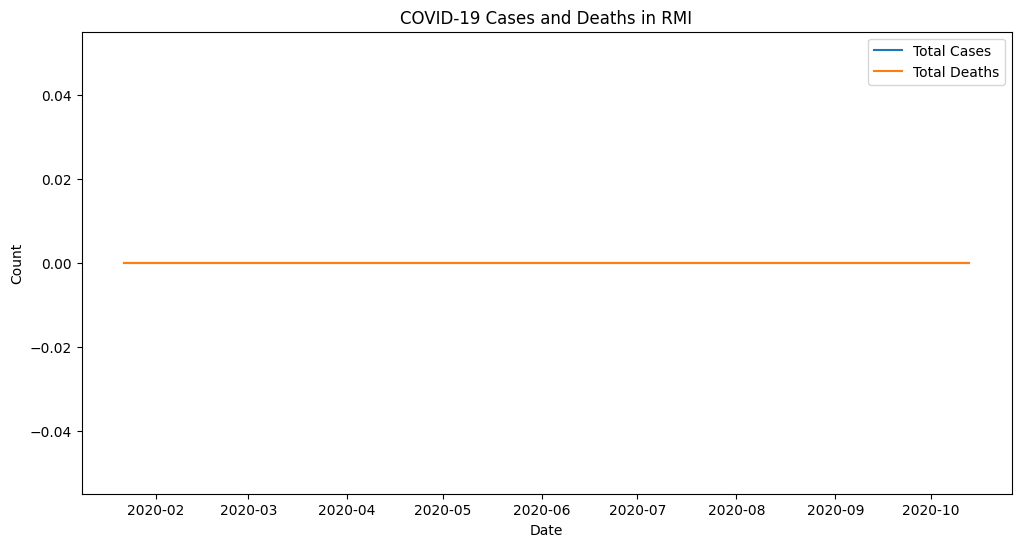

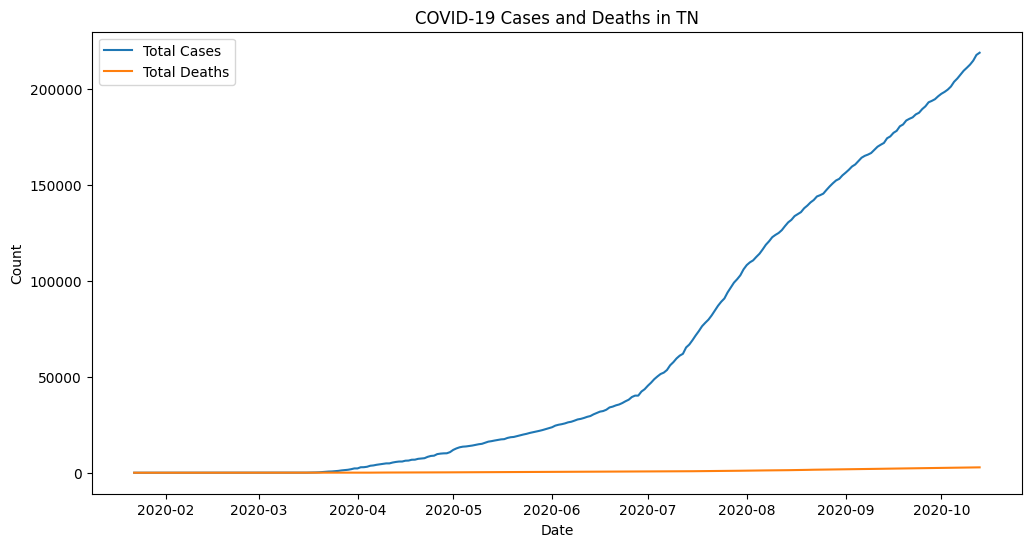

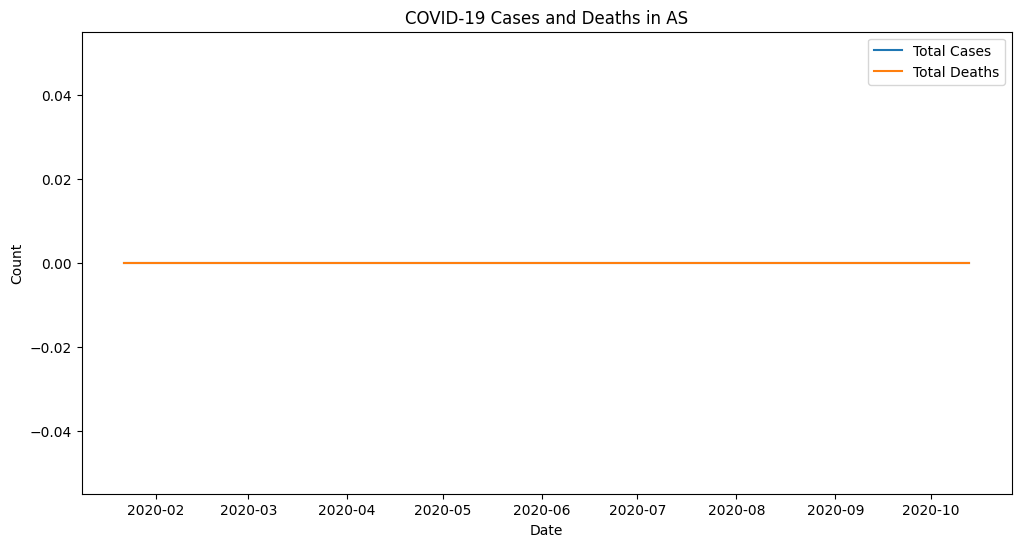

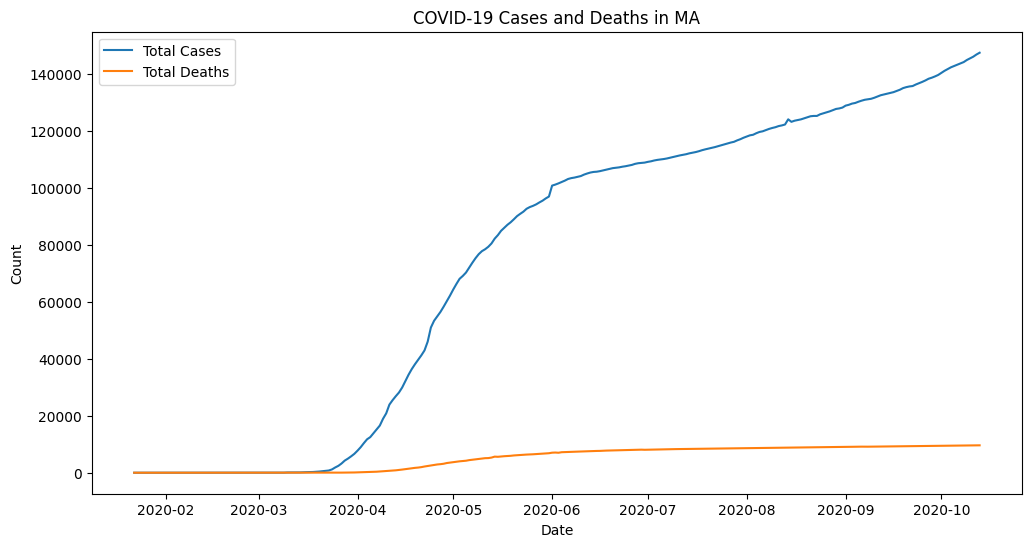

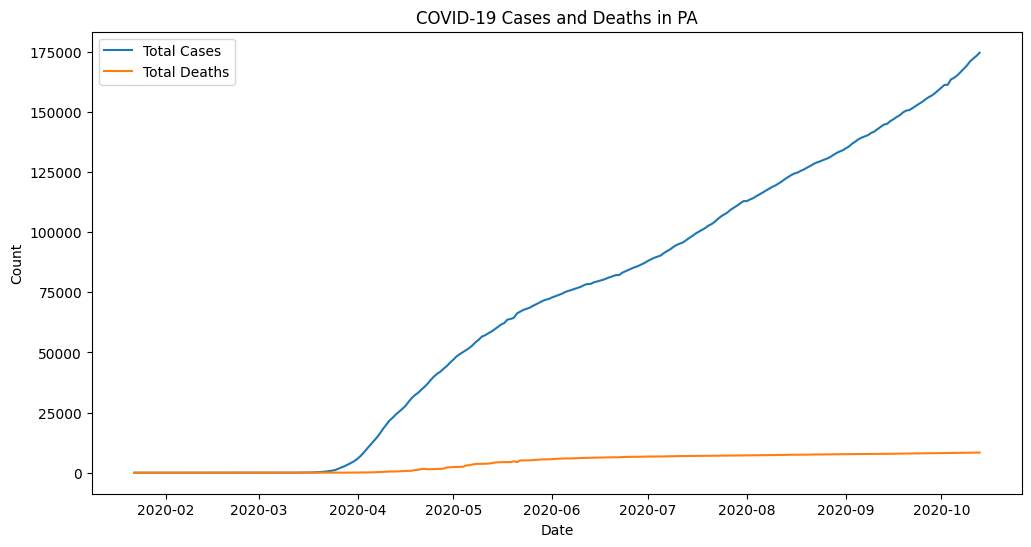

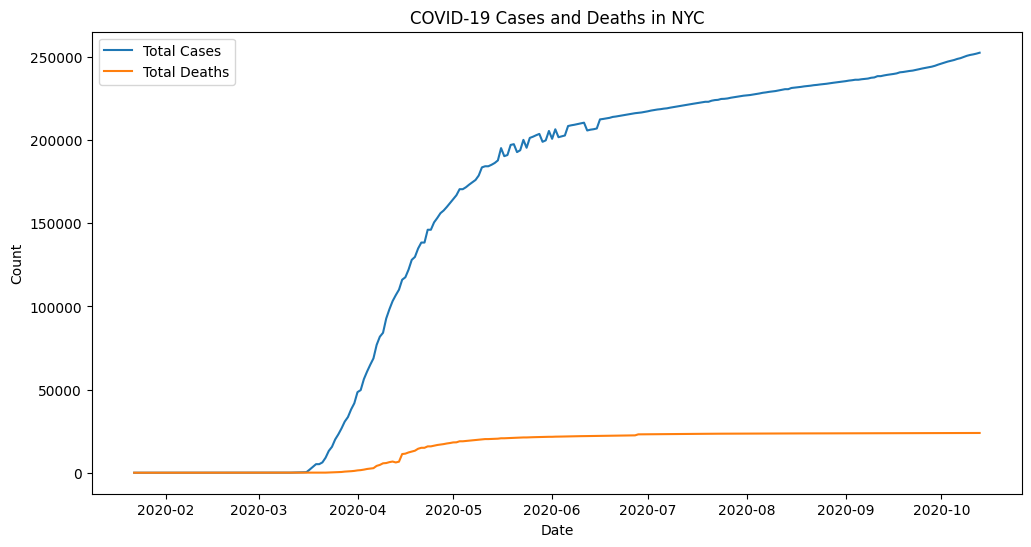

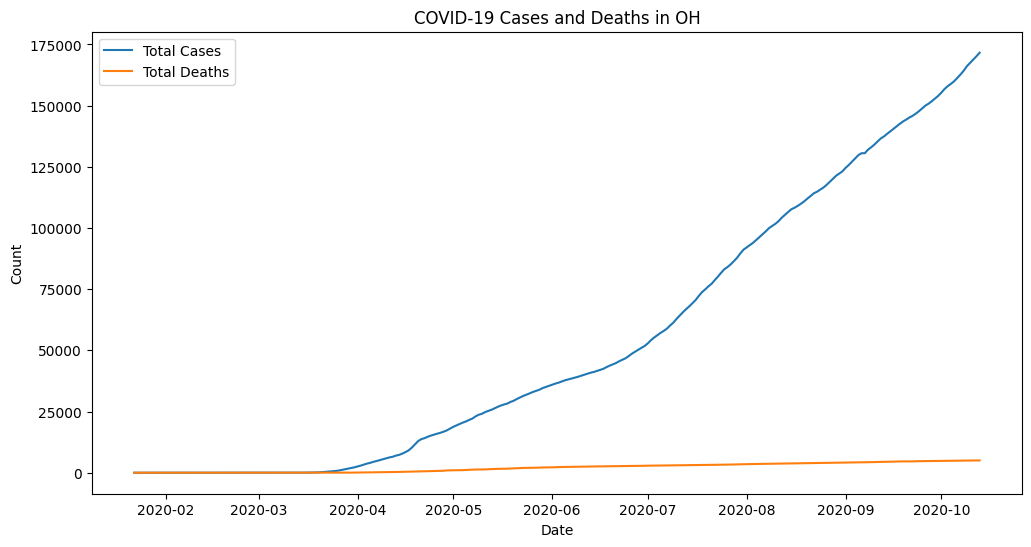

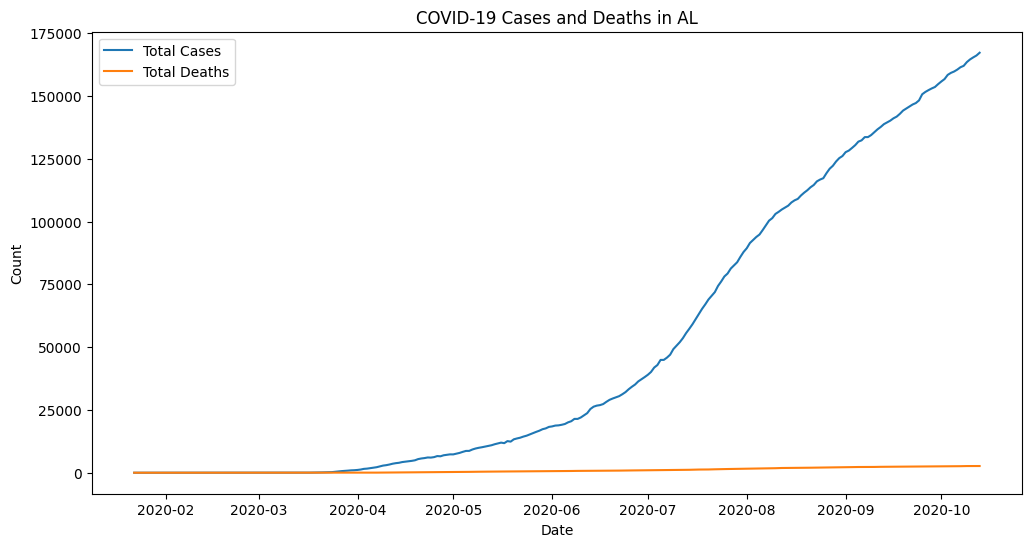

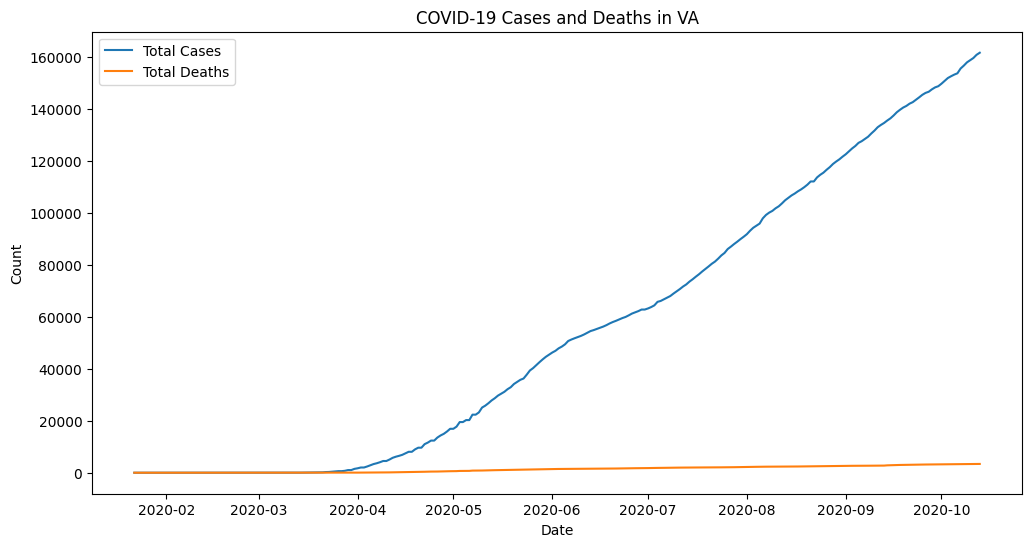

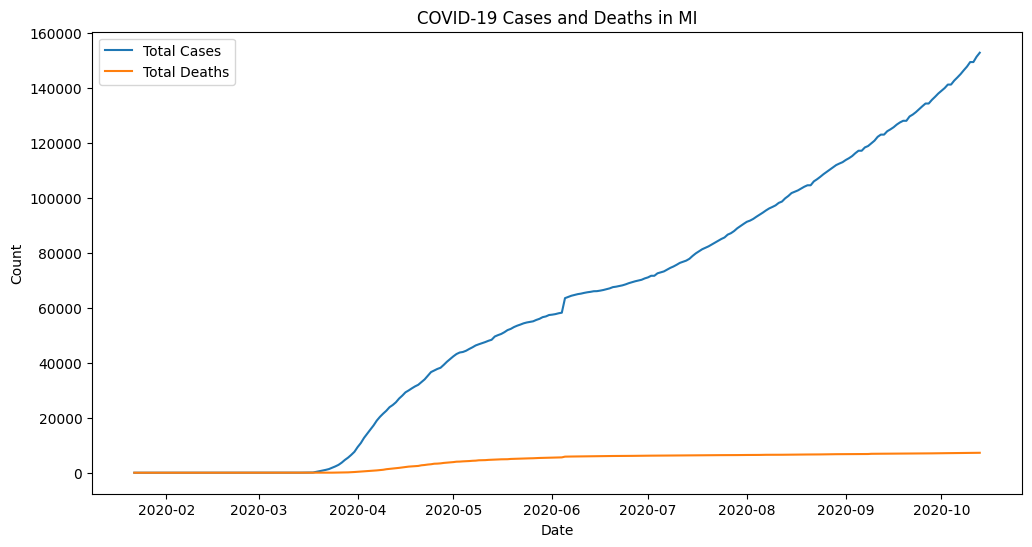

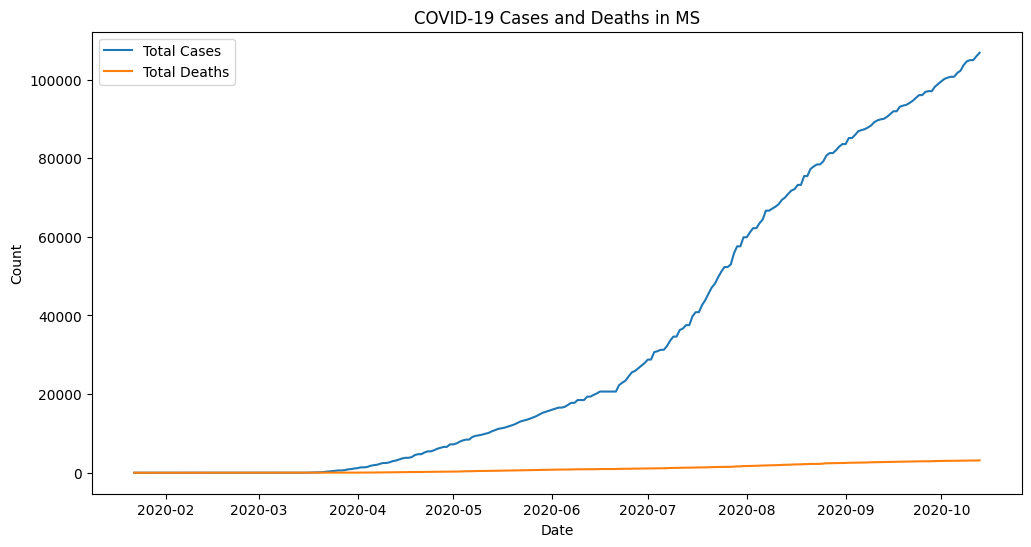

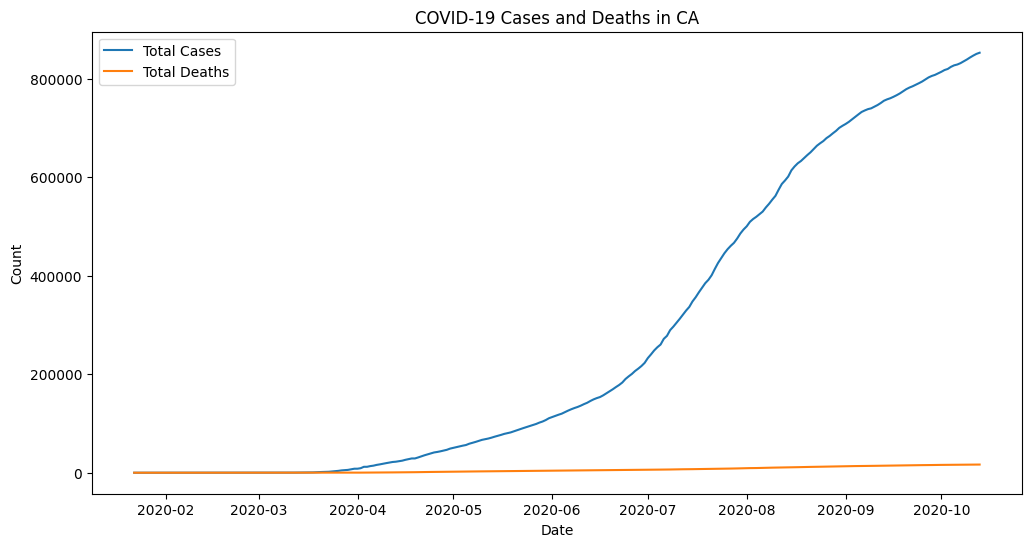

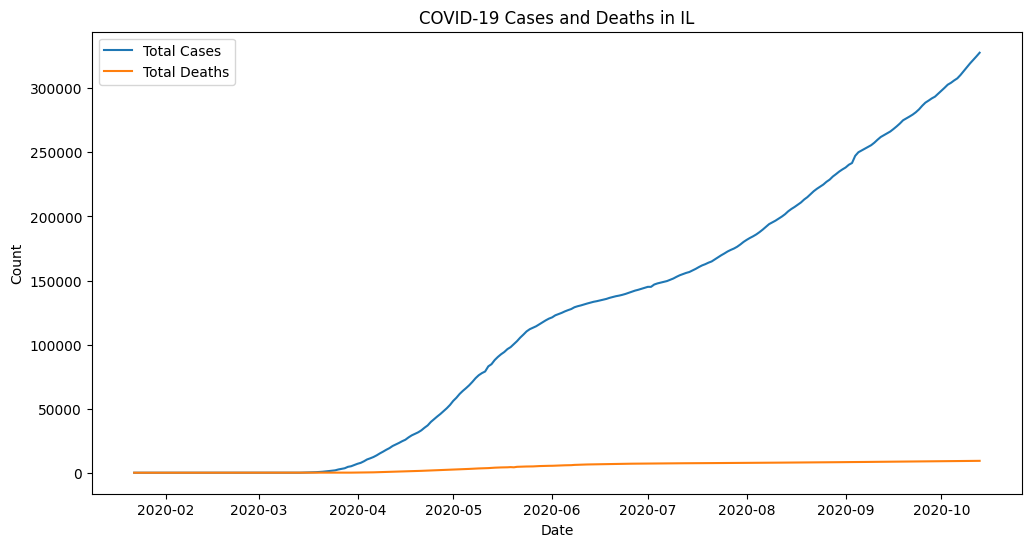

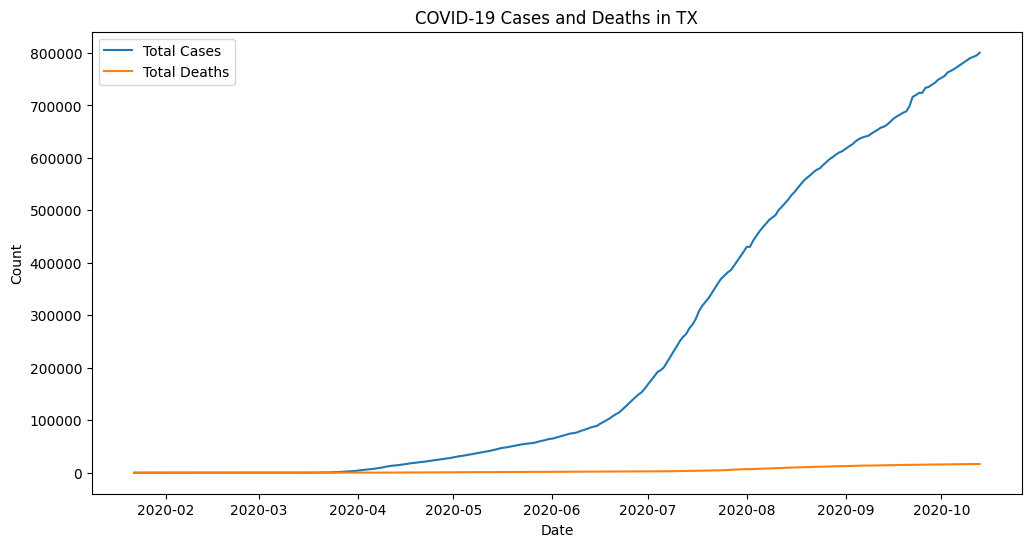

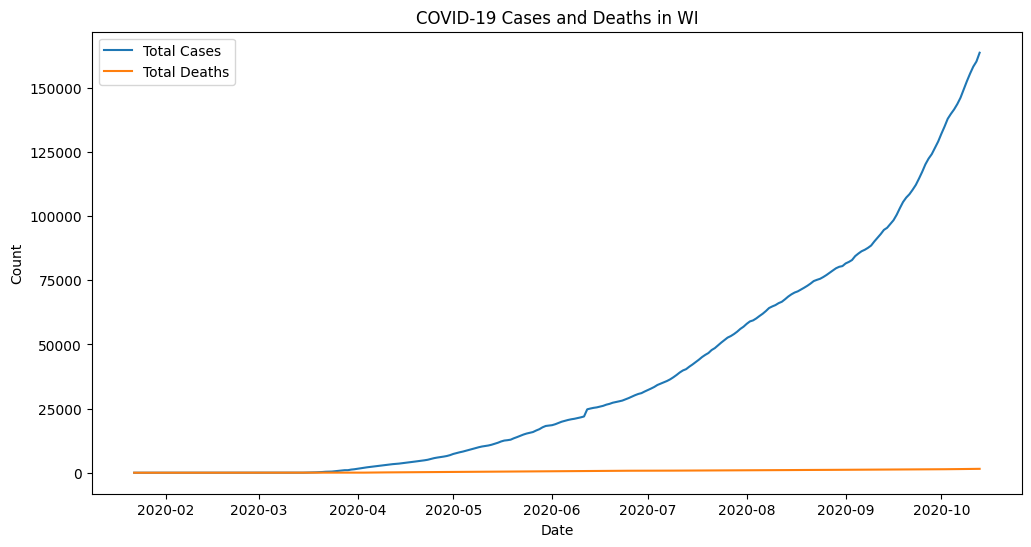

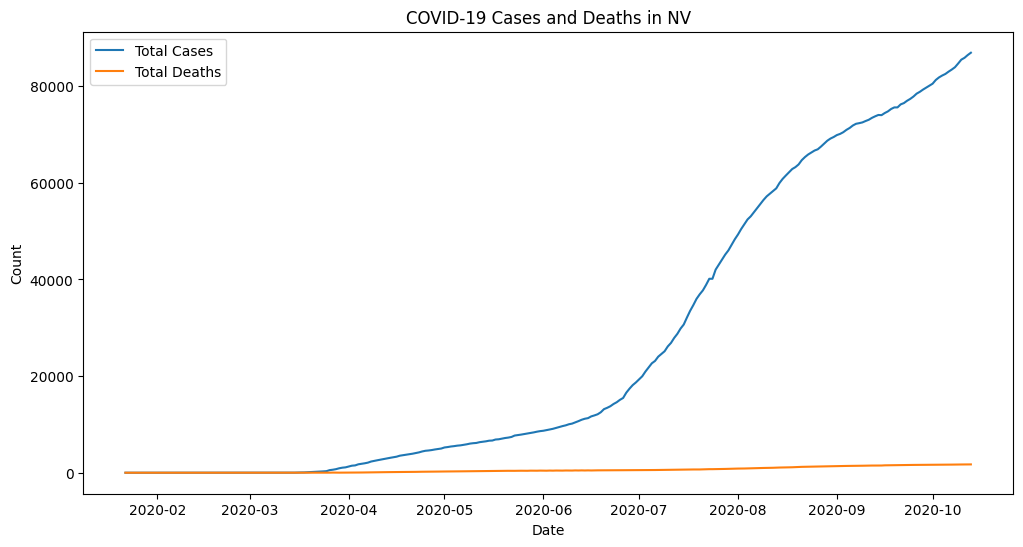

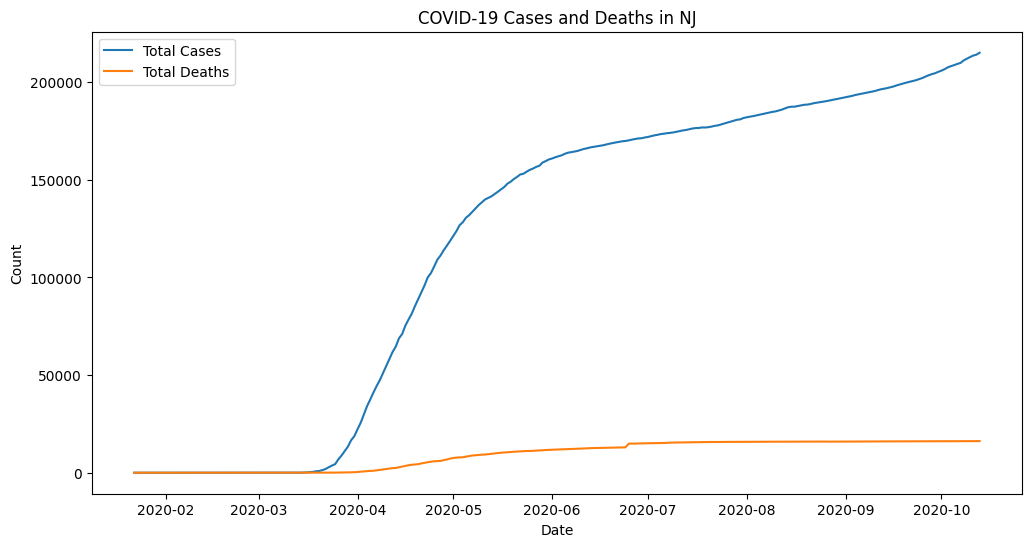

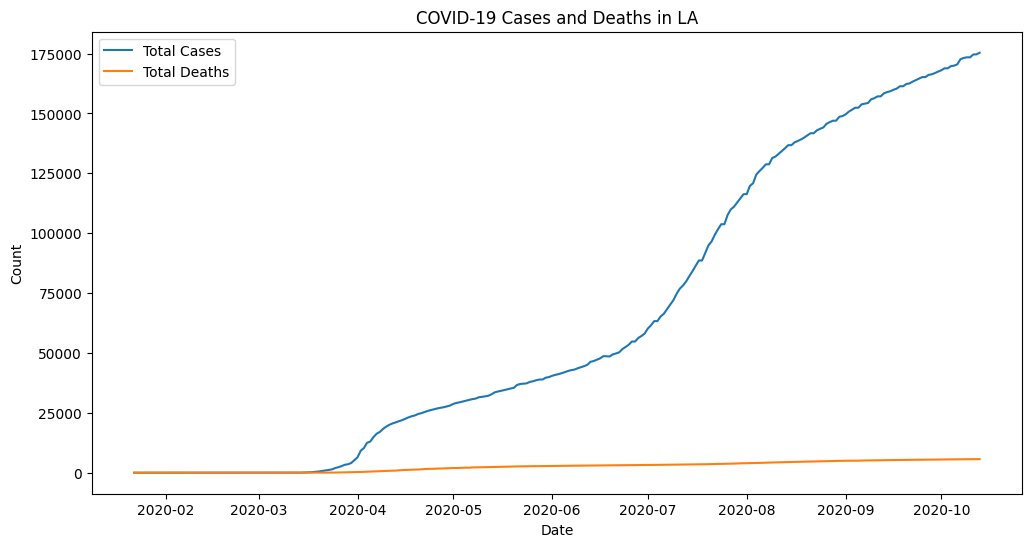

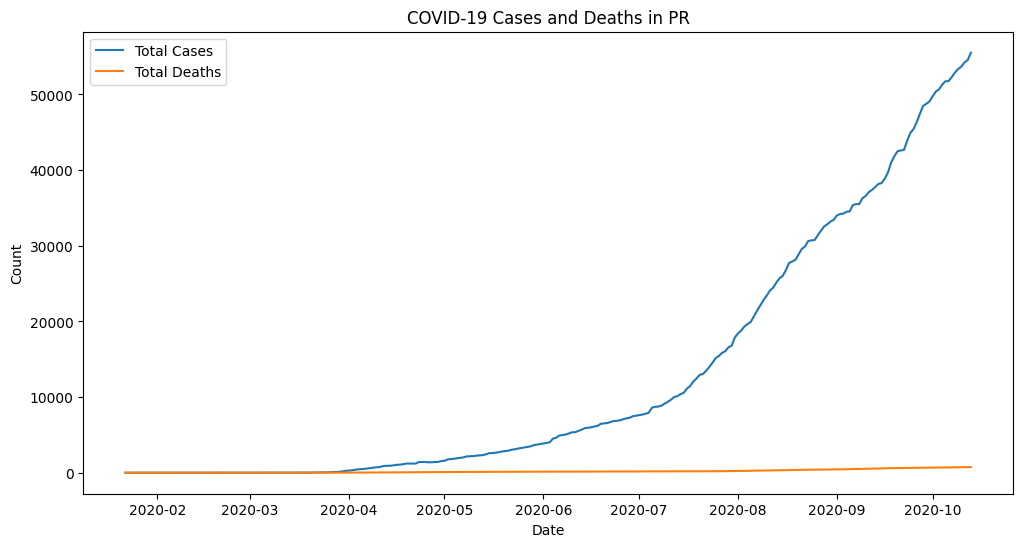

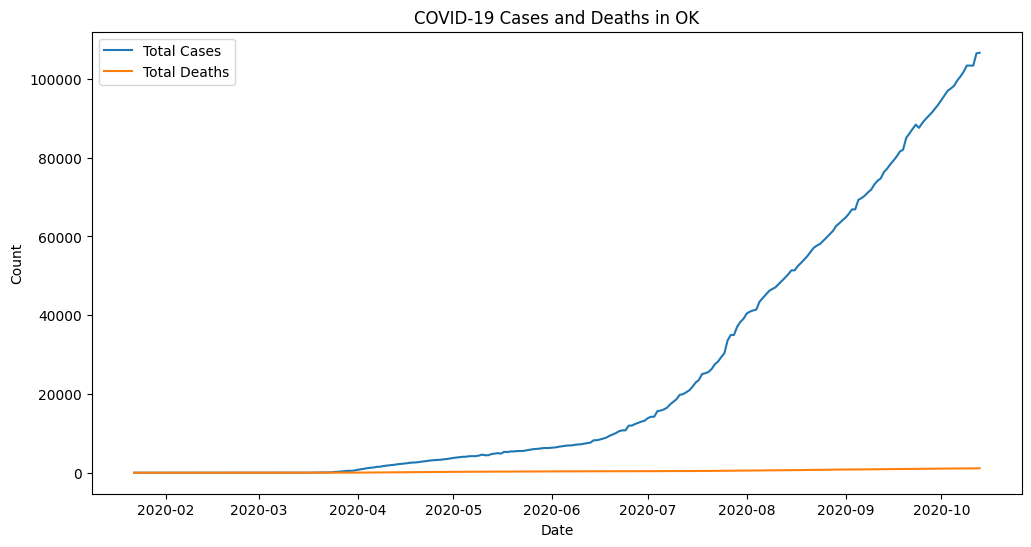

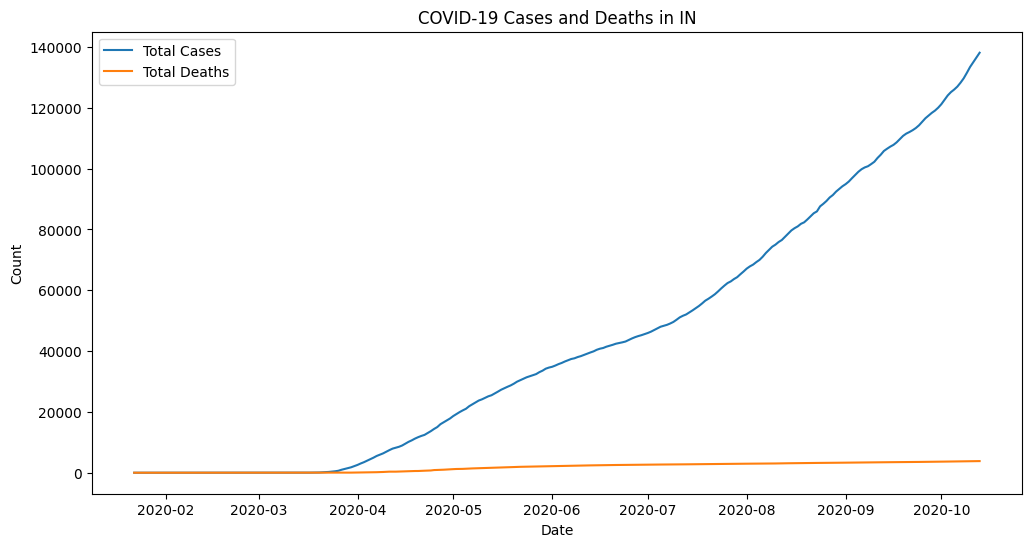

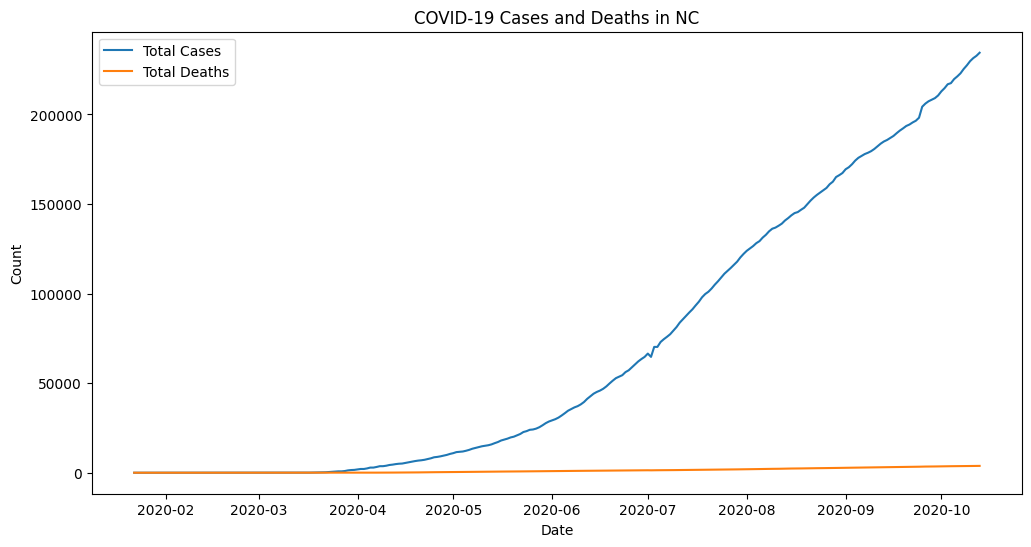

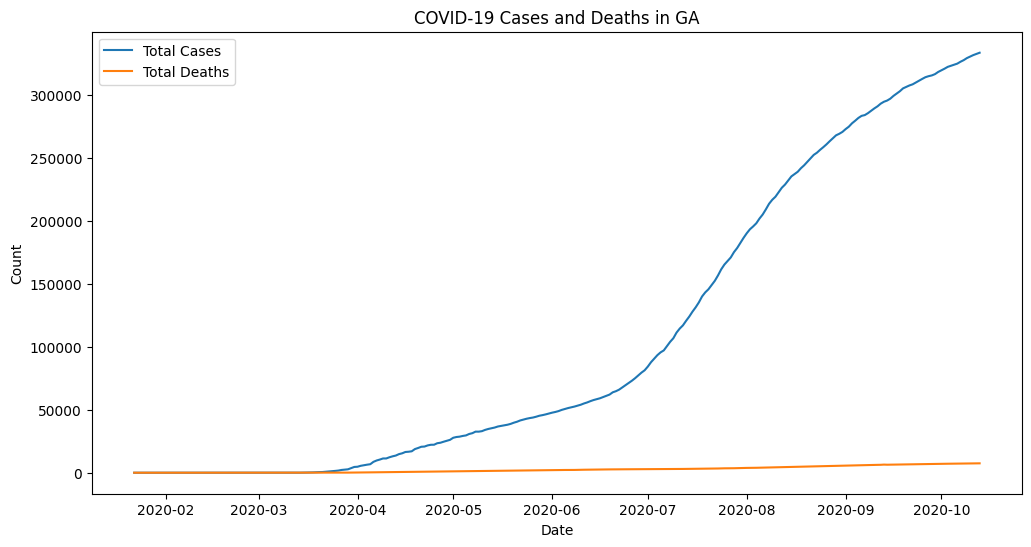

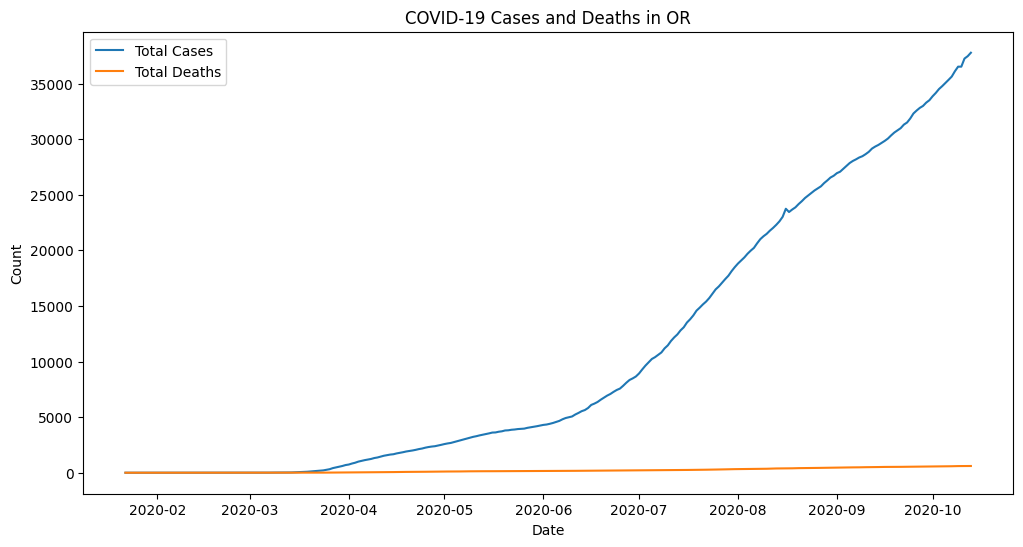

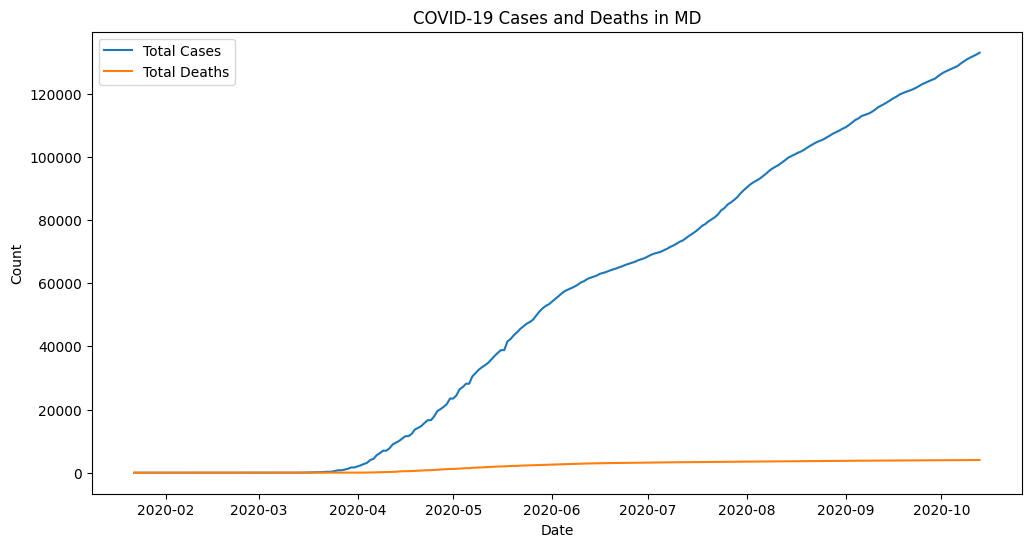

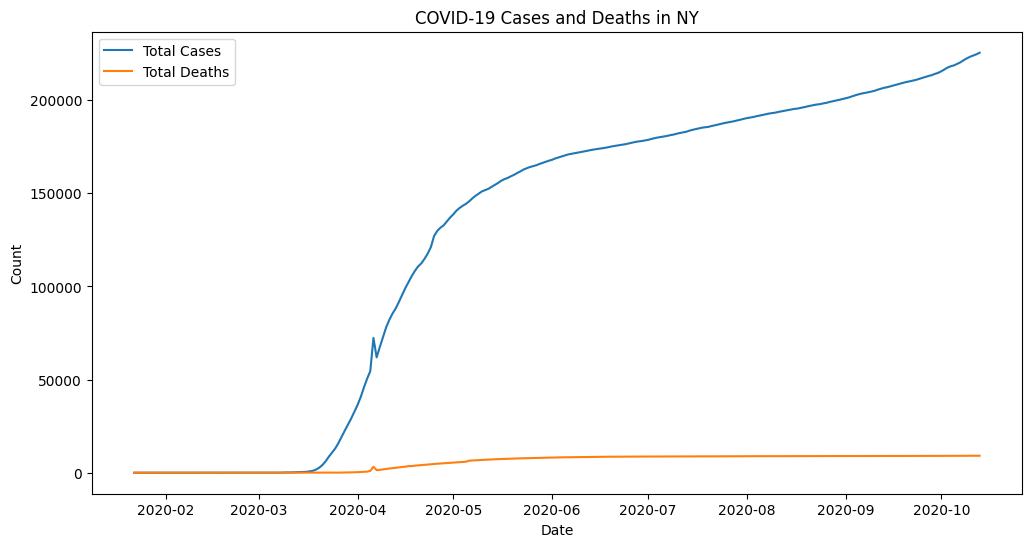

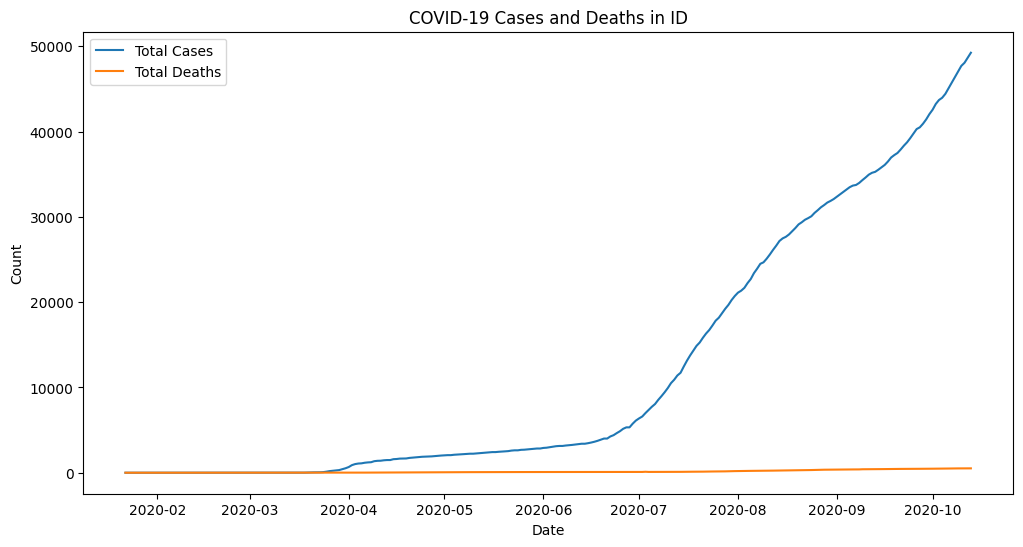

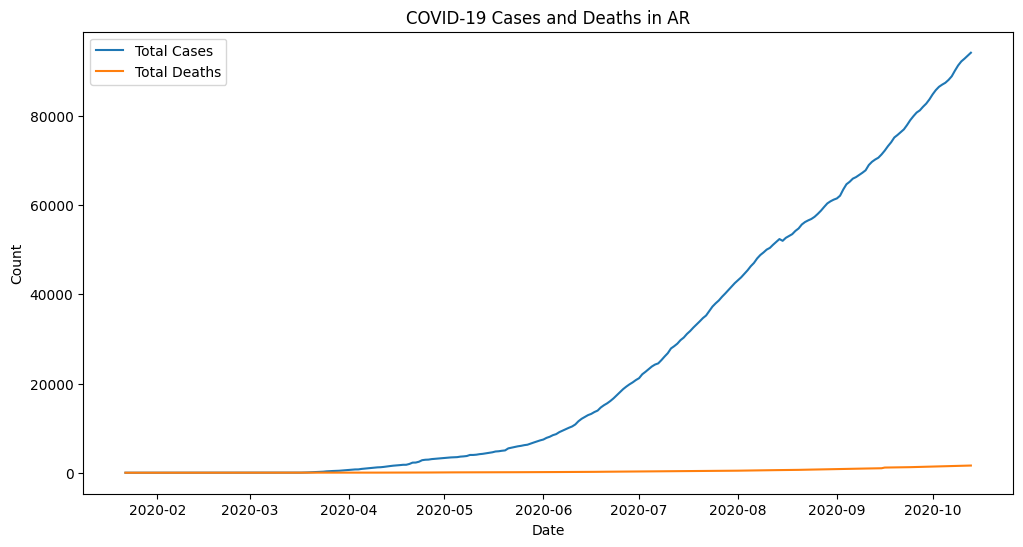

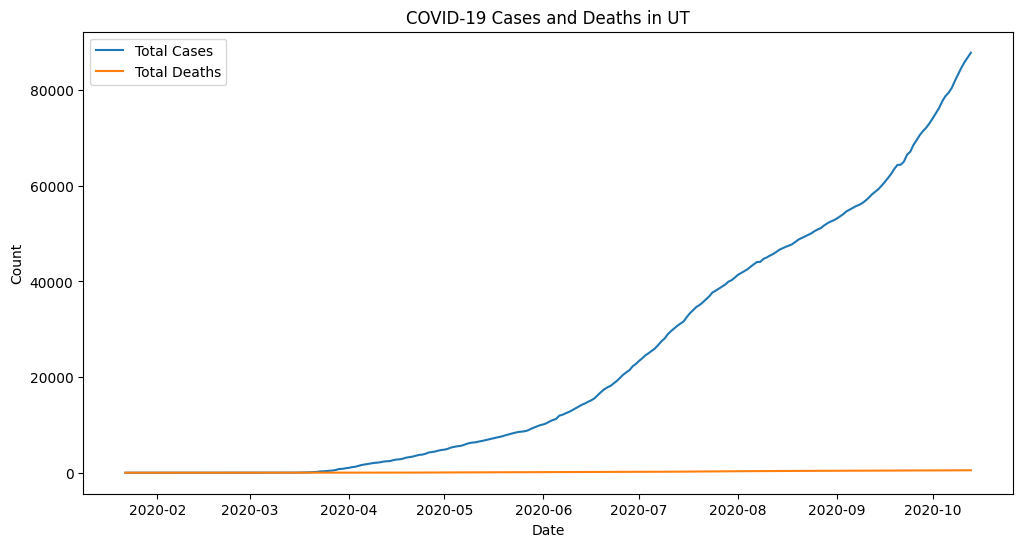

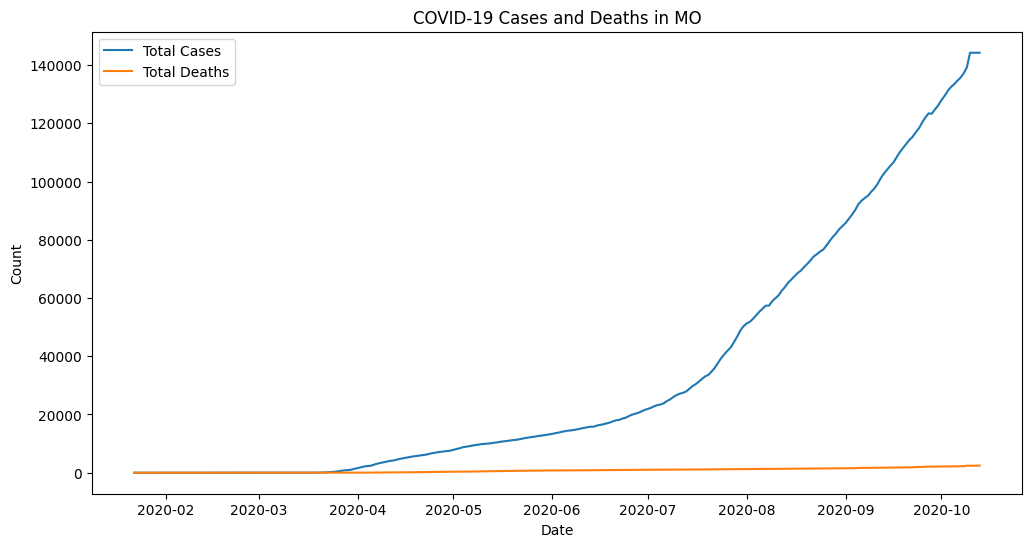

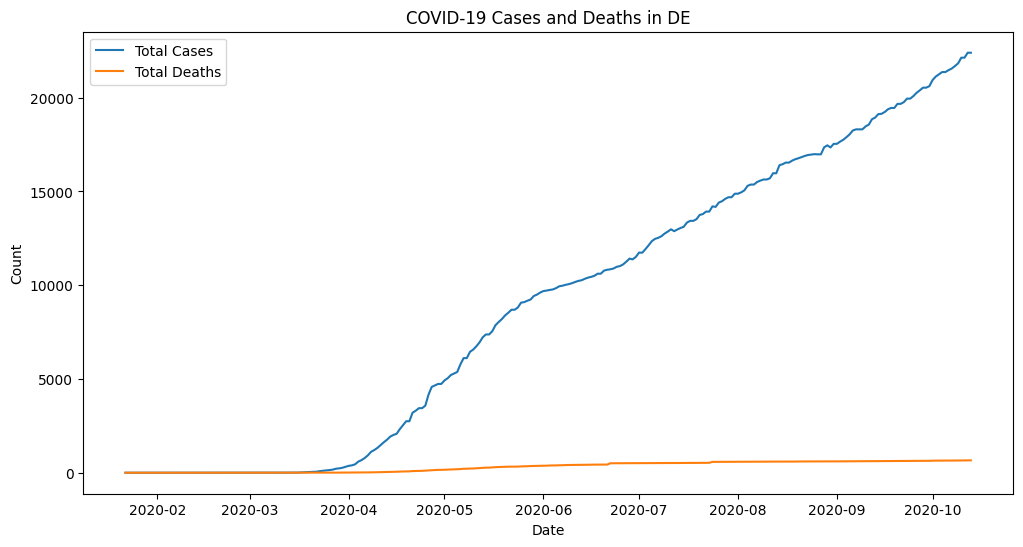

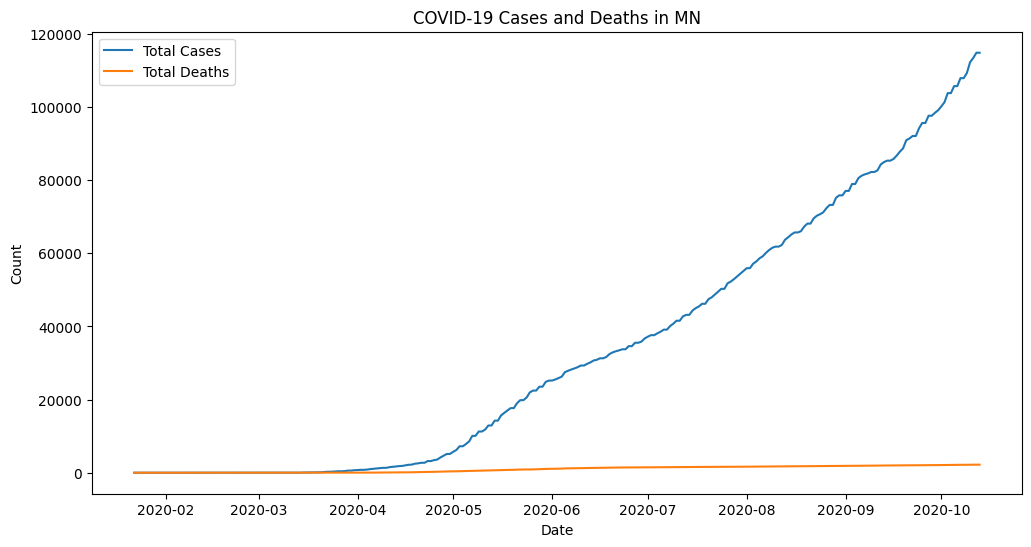

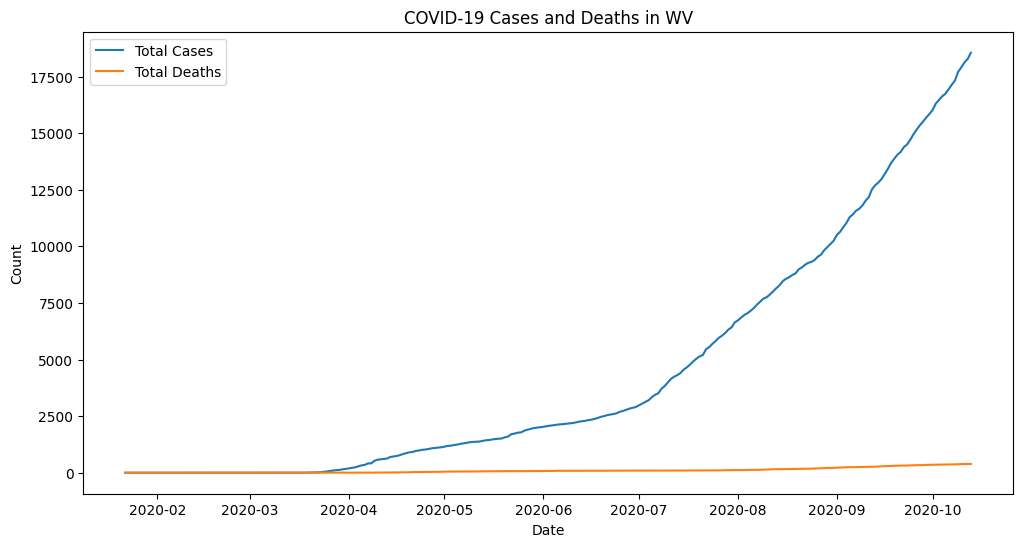

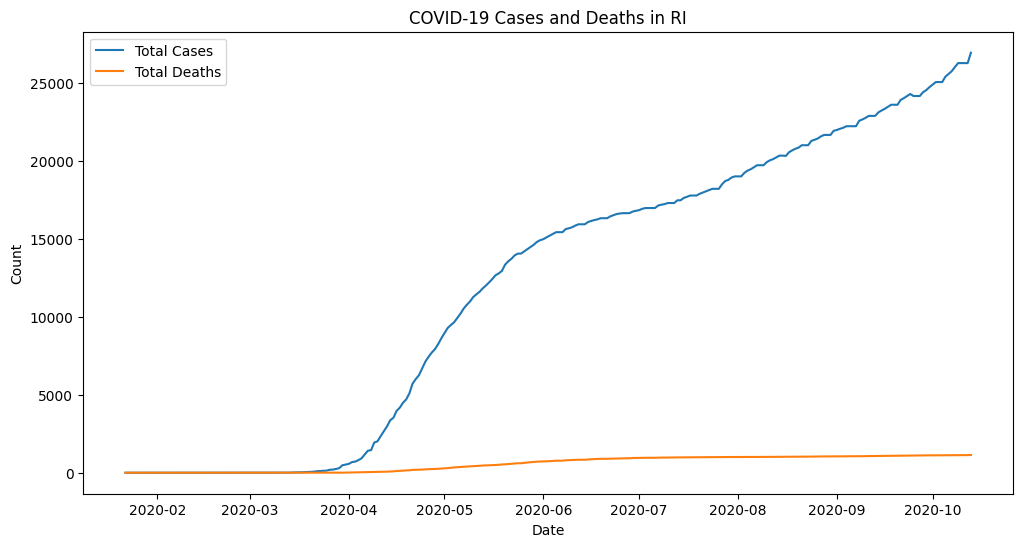

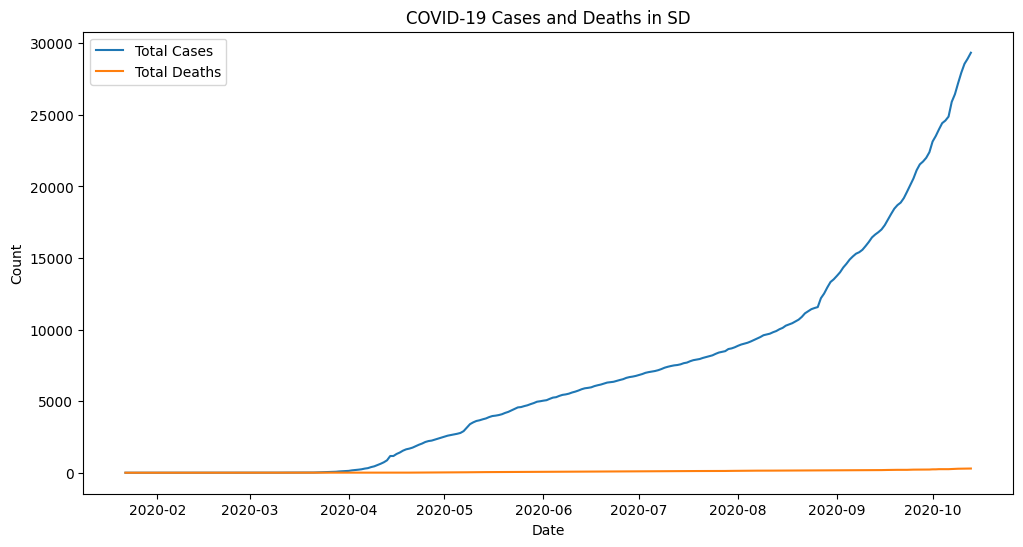

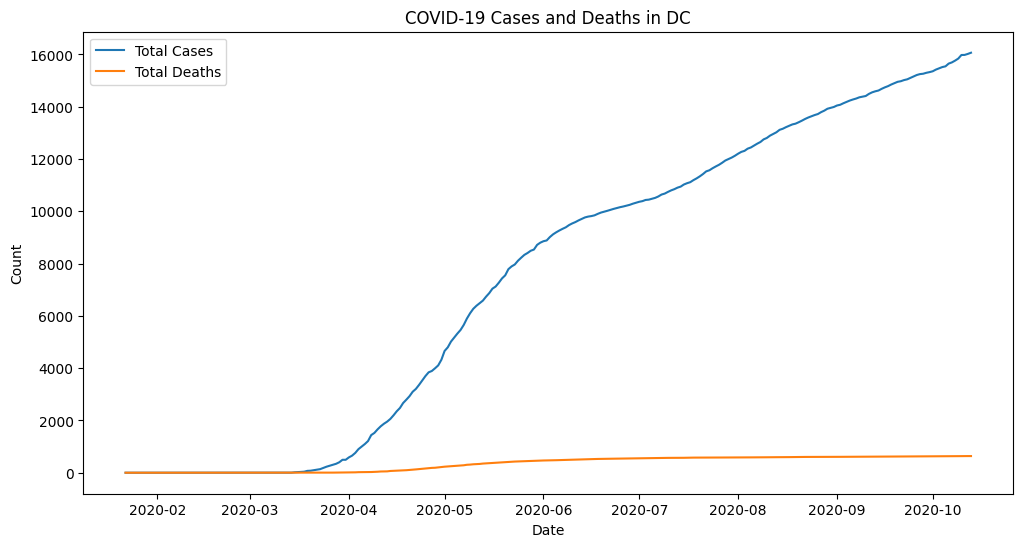

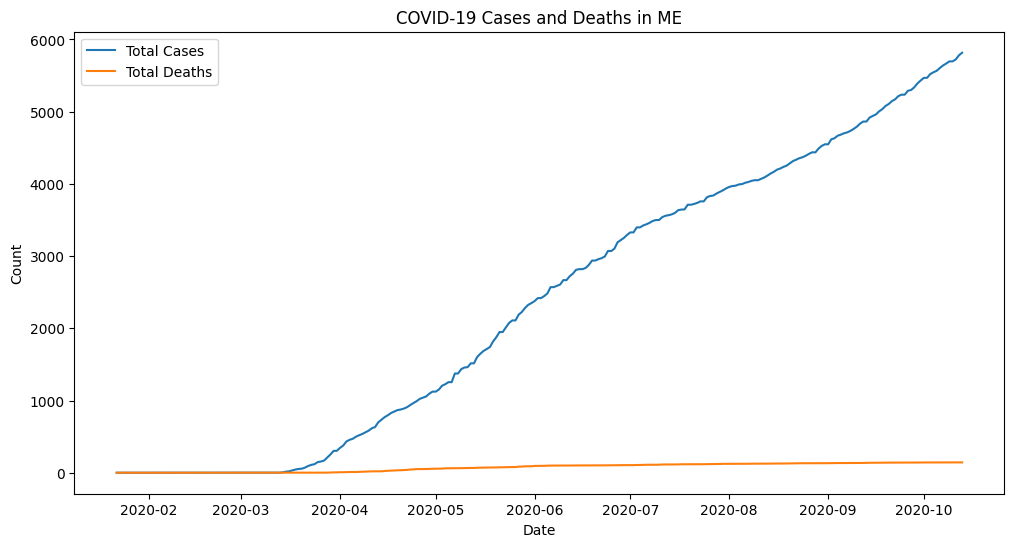

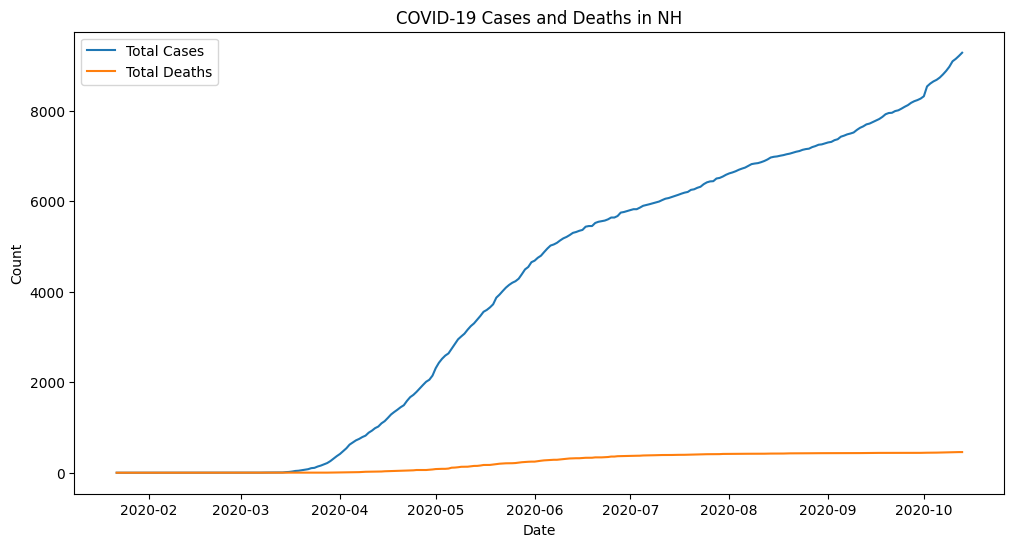

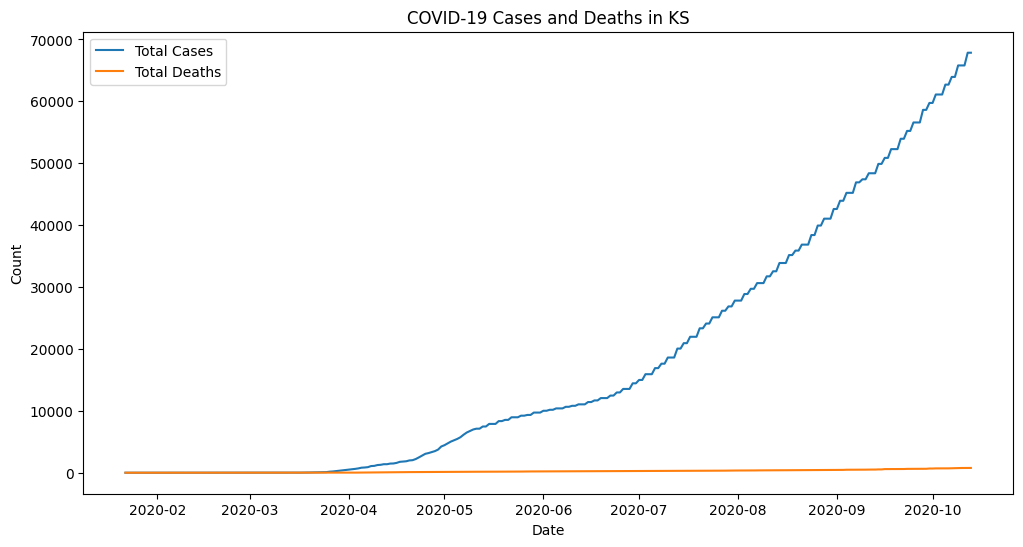

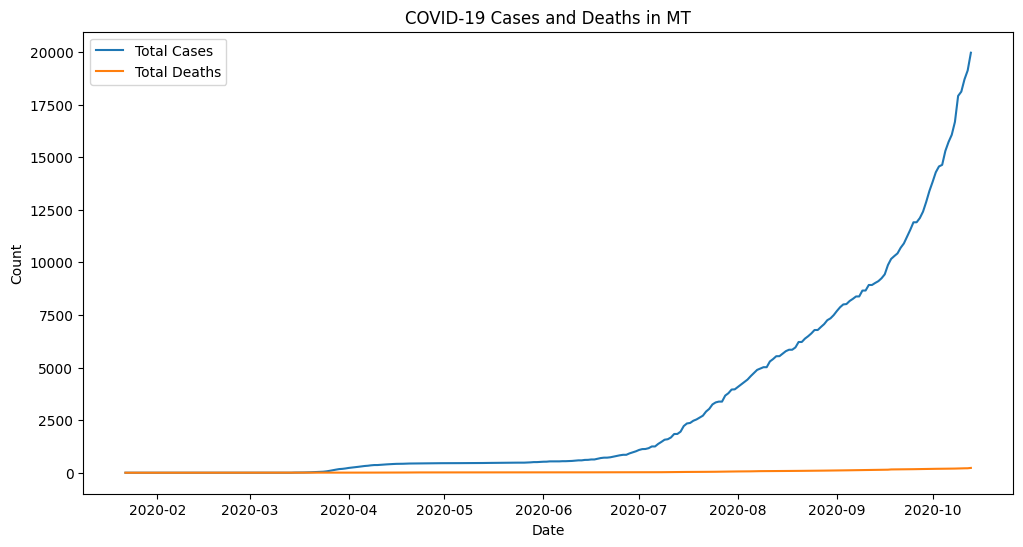

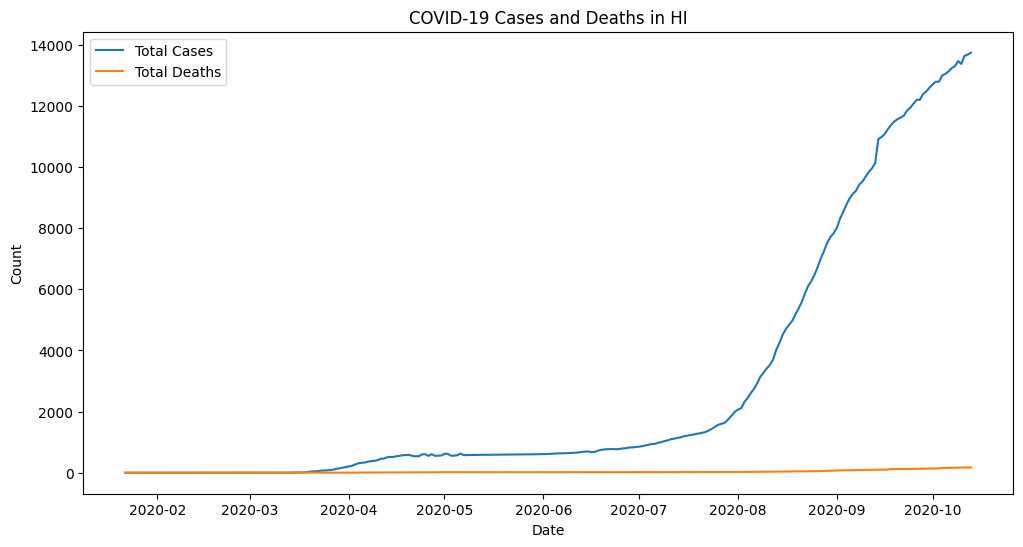

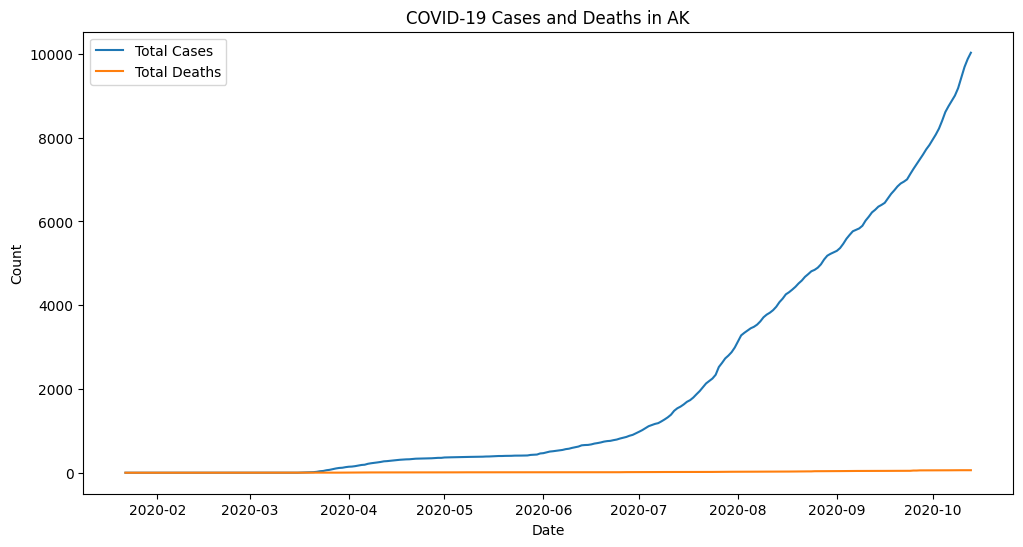

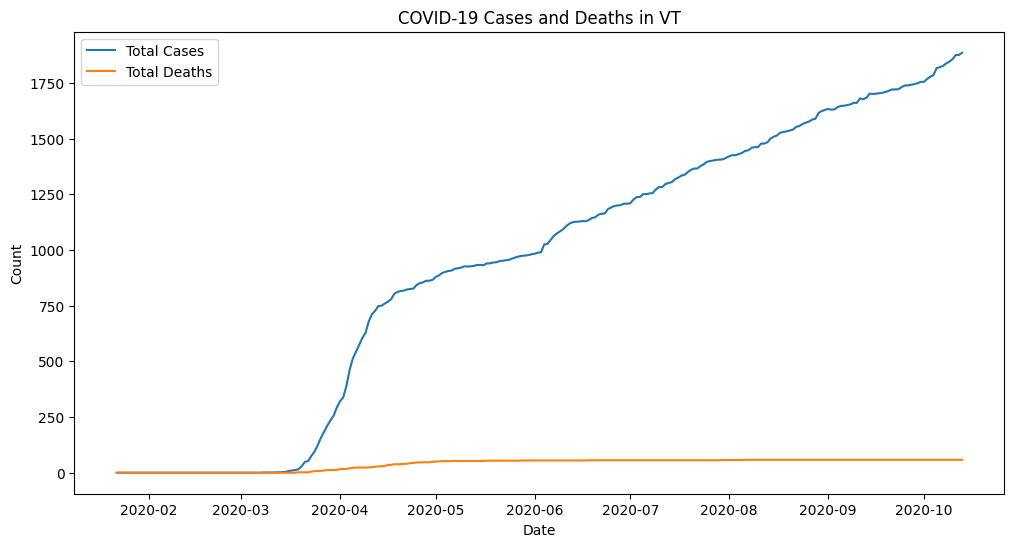

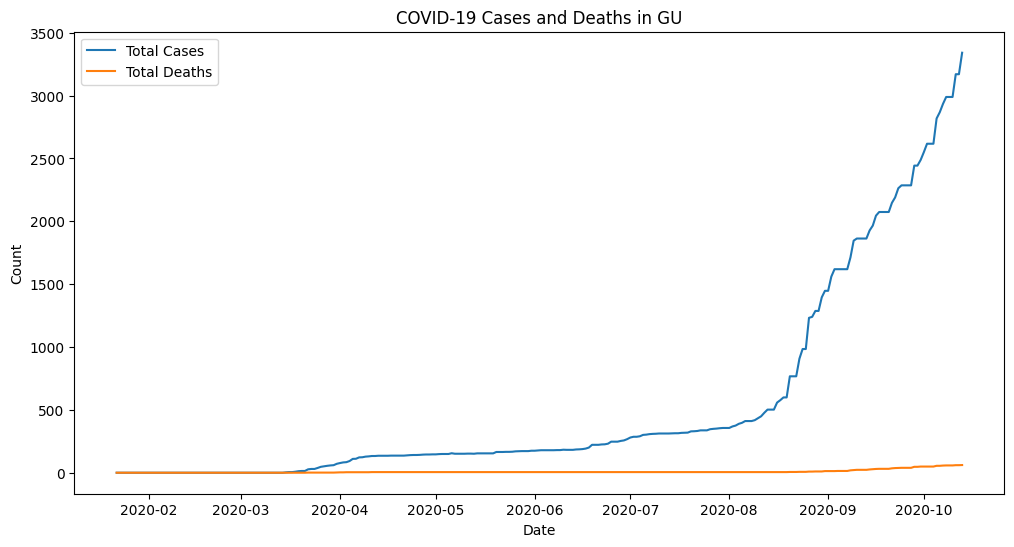

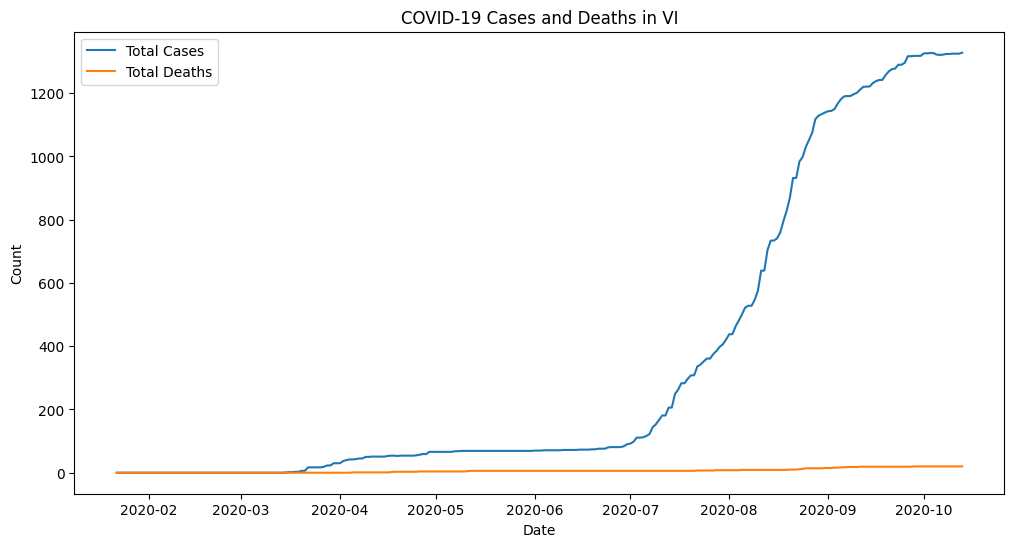

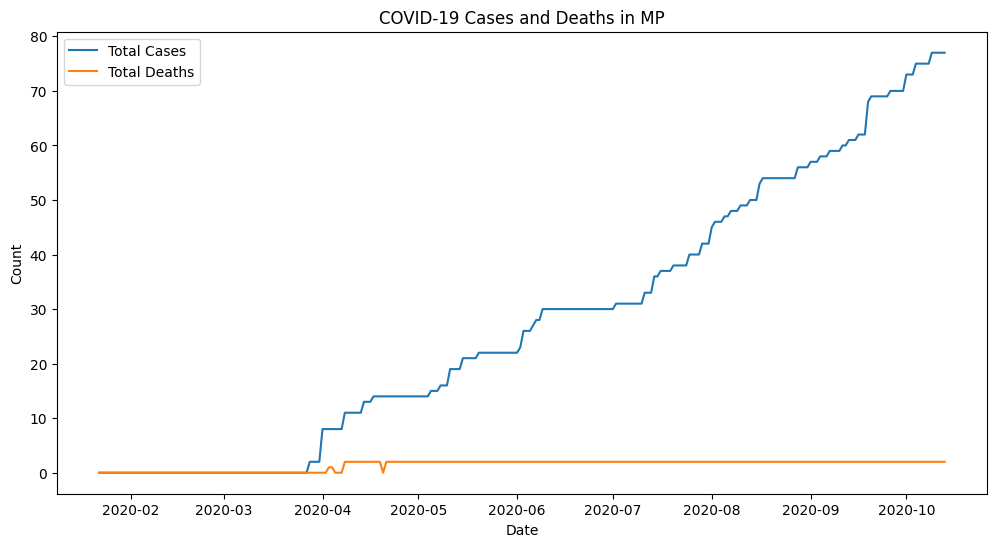

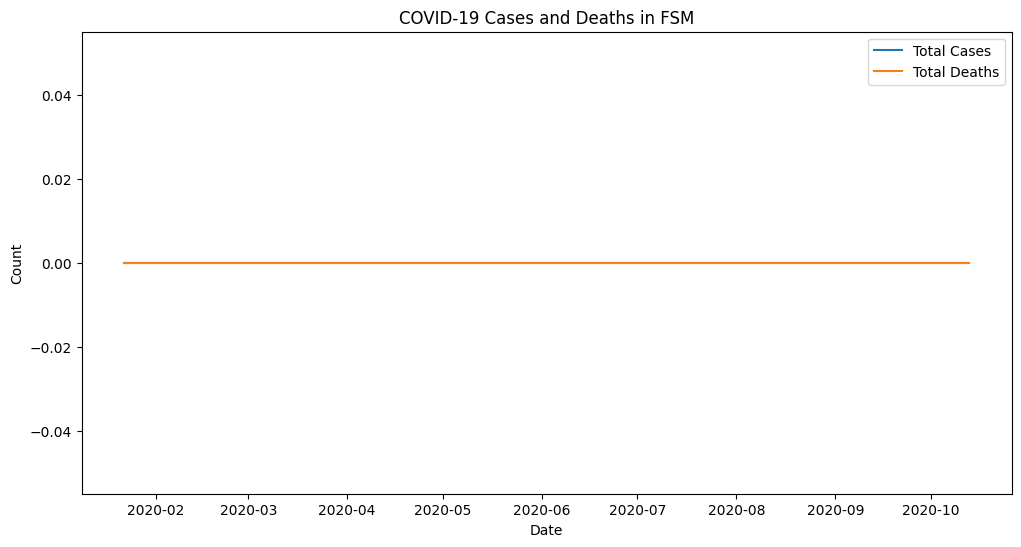

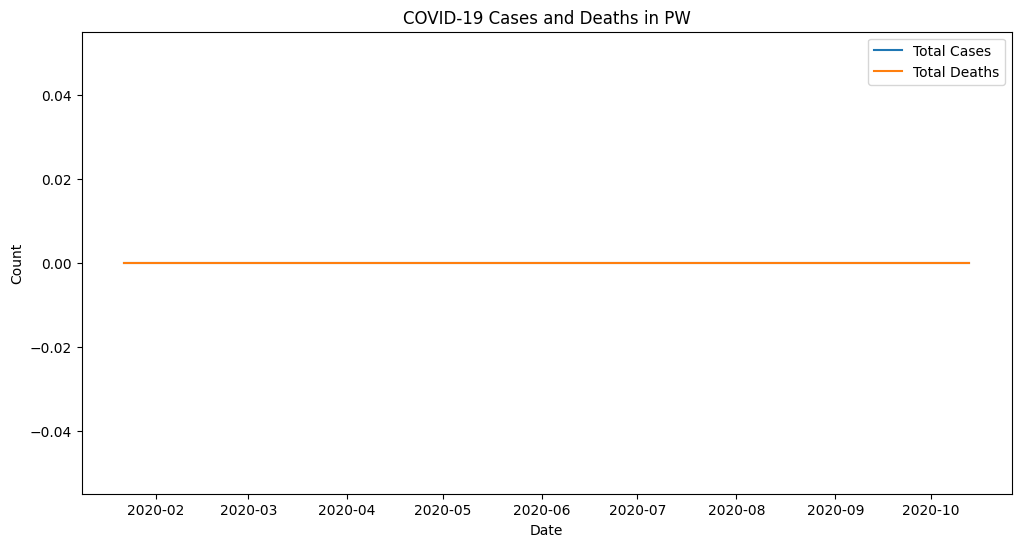

In [12]:
for state in df['state'].unique():
    state_data = df[df['state'] == state]
    plt.figure(figsize=(12, 6))
    plt.plot(state_data.index, state_data['tot_cases'], label='Total Cases')
    plt.plot(state_data.index, state_data['tot_death'], label='Total Deaths')
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.title(f'COVID-19 Cases and Deaths in {state}')
    plt.legend()
    plt.show()

In [14]:
# State-wise Analysis
for state in df['state'].unique():
    state_data = df[df['state'] == state]

    # Checking stationarity
    result = adfuller(df['tot_cases'])
    print(f'\nState: {state}')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')

    if result[1] > 0.05:
        print('Data is not stationary. Perform differencing.')
    else:
        print('Data is stationary.')


State: CO
ADF Statistic: -8.928393110210711
p-value: 9.96795681801763e-15
Data is stationary.

State: FL
ADF Statistic: -8.928393110210711
p-value: 9.96795681801763e-15
Data is stationary.

State: AZ
ADF Statistic: -8.928393110210711
p-value: 9.96795681801763e-15
Data is stationary.

State: SC
ADF Statistic: -8.928393110210711
p-value: 9.96795681801763e-15
Data is stationary.

State: CT
ADF Statistic: -8.928393110210711
p-value: 9.96795681801763e-15
Data is stationary.

State: NE
ADF Statistic: -8.928393110210711
p-value: 9.96795681801763e-15
Data is stationary.

State: KY
ADF Statistic: -8.928393110210711
p-value: 9.96795681801763e-15
Data is stationary.

State: WY
ADF Statistic: -8.928393110210711
p-value: 9.96795681801763e-15
Data is stationary.

State: IA
ADF Statistic: -8.928393110210711
p-value: 9.96795681801763e-15
Data is stationary.

State: NM
ADF Statistic: -8.928393110210711
p-value: 9.96795681801763e-15
Data is stationary.

State: ND
ADF Statistic: -8.928393110210711
p-val

C:\Users\dell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:691: RuntimeWarning: divide by zero encountered in divide
  acf = avf[: nlags + 1] / avf[0]
C:\Users\dell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:691: RuntimeWarning: invalid value encountered in divide
  acf = avf[: nlags + 1] / avf[0]
C:\Users\dell\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\axes\_base.py:2532: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
C:\Users\dell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\regression\linear_model.py:1489: ValueWarning: Matrix is singular. Using pinv.
  warnings.warn("Matrix is singular. Using pinv.", ValueWarning)


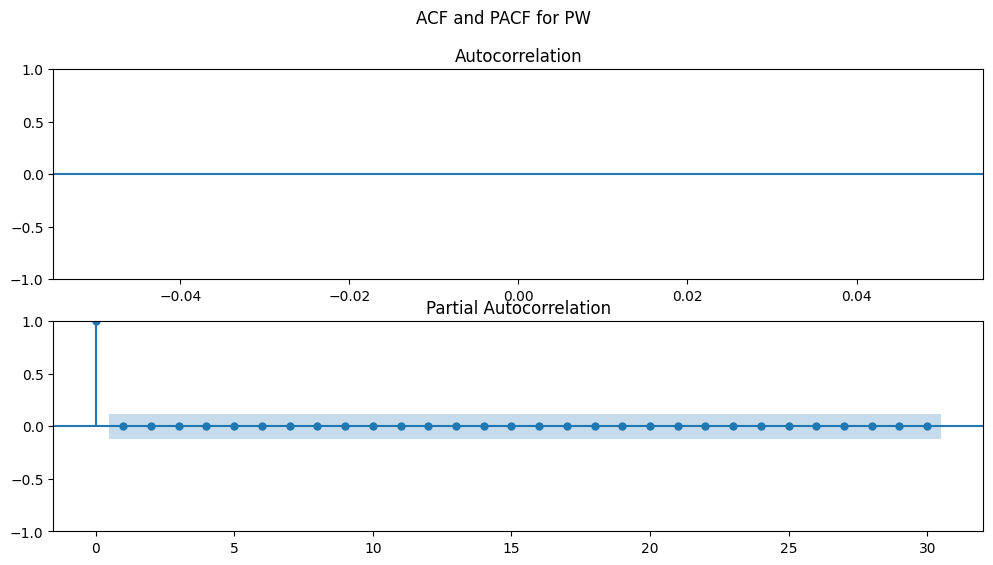

In [17]:
# Plotting ACF and PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))
plot_acf(state_data['tot_cases'], ax=ax1, lags=30)
plot_pacf(state_data['tot_cases'], ax=ax2, lags=30)
plt.suptitle(f'ACF and PACF for {state}')
plt.show()

In [18]:
# Fitting of ARIMA model
model = ARIMA(state_data['tot_cases'], order=(1, 0, 1))  # choose appropriate p, d, and q values
results = model.fit()

C:\Users\dell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\dell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\dell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\dell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [19]:
# Predict future cases
future_steps = 12  # Adjust as needed
forecast = results.get_forecast(steps=future_steps)

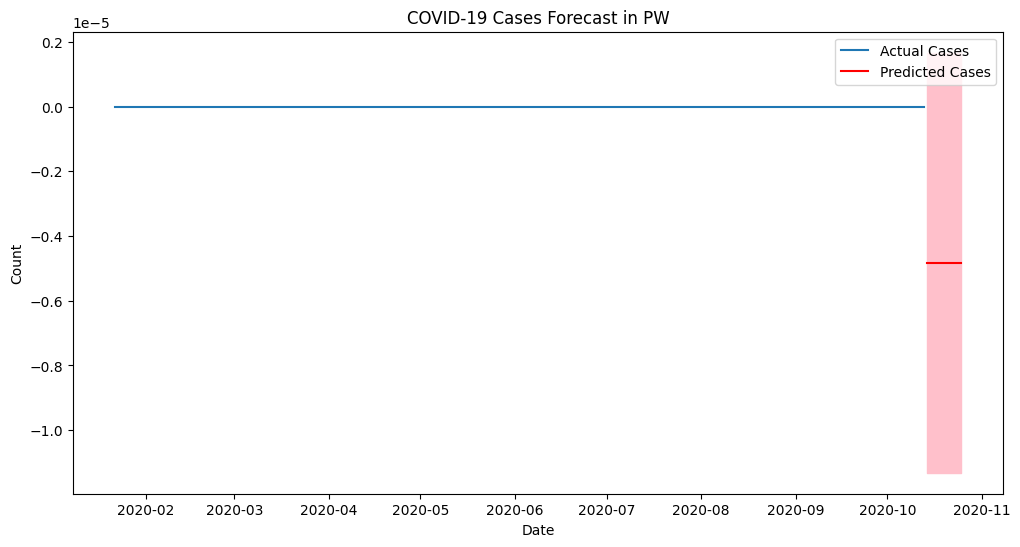

In [20]:
# results
plt.figure(figsize=(12, 6))
plt.plot(state_data.index, state_data['tot_cases'], label='Actual Cases')
plt.plot(forecast.predicted_mean.index, forecast.predicted_mean, color='red', label='Predicted Cases')
plt.fill_between(forecast.conf_int().index, forecast.conf_int()['lower tot_cases'], forecast.conf_int()['upper tot_cases'], color='pink')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title(f'COVID-19 Cases Forecast in {state}')
plt.legend()
plt.show()